#Bước 1: Quan sát dữ liệu thu thập được từ 2 nguồn khác nhau

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from collections import Counter

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df_cellphones = pd.read_excel('/content/dienthoai_CellPhones.xlsx')


In [ ]:
df_tgdd = pd.read_excel('/content/dienthoai_TGDD.xlsx')
df_tgdd=df_tgdd.drop(axis=1,columns=["Unnamed: 0"])

In [ ]:
df_cellphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Columns: 1821 entries, Tên to nhanvangiang nhanvangiang
dtypes: float64(1), object(1820)
memory usage: 6.6+ MB


In [ ]:
df_tgdd.head()

,Tên,Giá,Kích thước màn hình,Công nghệ màn hình,Camera sau,Camera trước,CPU,Dung lượng RAM,Bộ nhớ trong,Dung lượng pin,Loại pin,Thẻ SIM,Hệ điều hành,Độ phân giải màn hình,Loại CPU,Quay video,Tính năng camera,GPU,Khe cắm thẻ nhớ,Công nghệ sạc,Cổng sạc,Wi-Fi,Bluetooth,GPS,"Kích thước,khối lượng",Chất liệu,"Chỉ số kháng nước, bụi",Cảm biến vân tay,Tính năng đặc biệt,Jack tai nghe 3.5
0,Điện thoại Samsung Galaxy Z Fold3 5G 512GB,44990000,"Chính 7.6"" & Phụ 6.2"" - Tần số quét 120 Hz",Dynamic AMOLED 2X,3 camera 12 MP,10 MP & 4 MP,Snapdragon 888 8 nhân,12 GB,512 GB,4400 mAh,Li-Ion,2 Nano SIM,Android 11,Full HD+ (1768 x 2208 Pixels),"1 nhân 2.84 GHz, 3 nhân 2.42 GHz & 4 nhân 1.8 GHz",4K 2160p@60fps\nFullHD 1080p@240fps\nFullHD 1080p@60fps\nHD 720p@960fps,AI Camera\nBan đêm (Night Mode)\nChuyên nghiệp (Pro)\nChạm lấy nét\nChống rung quang học (OIS)\nGóc rộng (Wide)\nGóc siêu rộng (Ultrawide)\nHDR\nLàm đẹp\nLấy nét theo pha (PDAF)\nNhận diện khuôn mặt\nQuay chậm (Slow Motion)\nQuay Siêu chậm (Super Slow Motion)\nToàn cảnh (Panorama)\nTự động lấy nét (AF)\nXóa phông\nZoom quang học,Adreno 660,NaN,Sạc không dây Sạc pin nhanh,Type-C,Dual-band (2.4 GHz/5 GHz)\nWi-Fi 802.11 a/b/g/n/ac/ax\nWi-Fi Direct\nWi-Fi hotspot,A2DP\nLE\nv5.2,A-GPS\nBDS\nGALILEO\nGLONASS,Dài 158.2 mm - Ngang 128.1 mm - Dày 6.4 mm - Nặng 271 g,Khung nhôm & Mặt lưng kính cường lực,IPX8,Mở khoá vân tay cạnh viền,Samsung Pay Âm thanh AKG,NaN
1,Điện thoại iPhone 12 64GB,22490000,"6.1"" - Tần số quét 60 Hz",OLED,2 camera 12 MP,12 MP,Apple A14 Bionic 6 nhân,4 GB,64 GB,2815 mAh,Li-Ion,1 Nano SIM & 1 eSIM,iOS 14,1170 x 2532 Pixels,2 nhân 3.1 GHz & 4 nhân 1.8 GHz,4K 2160p@24fps\n4K 2160p@30fps\n4K 2160p@60fps\nFullHD 1080p@120fps\nFullHD 1080p@240fps\nFullHD 1080p@30fps\nFullHD 1080p@60fps\nHD 720p@30fps,Ban đêm (Night Mode)\nGóc rộng (Wide)\nGóc siêu rộng (Ultrawide)\nNhận diện khuôn mặt\nQuay chậm (Slow Motion)\nSmart HDR 3\nToàn cảnh (Panorama)\nTrôi nhanh thời gian (Time Lapse)\nTự động lấy nét (AF)\nXóa phông\nZoom kỹ thuật số,Apple GPU 4 nhân,NaN,Sạc không dây\nSạc không dây MagSafe\nSạc pin nhanh\nTiết kiệm pin,Lightning,Dual-band (2.4 GHz/5 GHz)\nWi-Fi 802.11 a/b/g/n/ac/ax\nWi-Fi hotspot\nWi-Fi MIMO,A2DP v5.0,A-GPS\nBDS\nGALILEO\nGLONASS\niBeacon\nQZSS,Dài 146.7 mm - Ngang 71.5 mm - Dày 7.4 mm - Nặng 164 g,Khung nhôm & Mặt lưng kính cường lực,IP68,Mở khoá khuôn mặt Face ID,NaN,Lightning
2,Điện thoại Xiaomi 11T 5G 128GB,10990000,"6.67"" - Tần số quét 120 Hz",AMOLED,"Chính 108 MP & Phụ 8 MP, 5 MP",16 MP,MediaTek Dimensity 1200 8 nhân,8 GB,128 GB,5000 mAh,Li-Po,2 Nano SIM,Android 11,Full HD+ (1080 x 2400 Pixels),"1 nhân 3 GHz, 3 nhân 2.6 GHz & 4 nhân 2 GHz",4K 2160p@30fps\nFullHD 1080p@30fps\nFullHD 1080p@60fps,AI Camera\nBan đêm (Night Mode)\nChạm lấy nét\nCinematic\nGóc rộng (Wide)\nGóc siêu rộng (Ultrawide)\nHDR\nLàm đẹp\nNhận diện khuôn mặt\nSiêu cận (Macro)\nToàn cảnh (Panorama)\nTrôi nhanh thời gian (Time Lapse)\nTự động lấy nét (AF)\nXóa phông,Mali-G77 MC9,NaN,Sạc pin nhanh Tiết kiệm pin,Type-C,Dual-band (2.4 GHz/5 GHz)\nWi-Fi 802.11 a/b/g/n/ac/ax\nWi-Fi Direct\nWi-Fi hotspot,A2DP\nLE\nv5.2,A-GPS\nBDS\nGALILEO\nGLONASS\nQZSS,Dài 164.1 mm - Ngang 76.9 mm - Dày 8.8 mm - Nặng 203 g,Khung kim loại & Mặt lưng kính,Không có,Mở khoá khuôn mặt Mở khoá vân tay cạnh viền,Ghi âm cuộc gọi\nKhông gian thứ hai\nỨng dụng kép (Nhân bản ứng dụng),Type-C
3,Điện thoại Samsung Galaxy A03s,3690000,"6.5"" - Tần số quét 60 Hz",PLS LCD,"Chính 13 MP & Phụ 2 MP, 2 MP",5 MP,MediaTek MT6765 8 nhân,4 GB,64 GB,5000 mAh,Li-Po,2 Nano SIM,Android 11,HD+ (720 x 1600 Pixels),4 nhân 2.3 GHz & 4 nhân 1.8 GHz,FullHD 1080p@30fps,Chạm lấy nét\nHDR\nLàm đẹp\nLấy nét theo pha (PDAF)\nNhận diện khuôn mặt\nSiêu cận (Macro)\nToàn cảnh (Panorama)\nTự động lấy nét (AF)\nXóa phông\nZoom kỹ thuật số,IMG PowerVR GE8320,"MicroSD, hỗ trợ tối đa 1 TB",Tiết kiệm pin,Type-C,Wi-Fi 802.11 b/g/n Wi-Fi hotspot,A2DP\nLE\nv5.0,A-GPS\nBDS\nGALILEO\nGLONASS,Dài 164 mm - Ngang 7.6 mm - Dày 9.1 mm - Nặng 196 g,Khung & Mặt lưng nh

##Đếm số cột của mỗi bộ dữ liệu

In [ ]:
print(df_cellphones.columns)
print(len(df_cellphones.columns))

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'Chipset', 'Dung lượng RAM', 'Bộ nhớ trong', 'Pin',
       ...
       'Nguyễn Văn khánh', 'Bui nhat teuong', 'nguyễn my', 'Nguyễn hữu toàn',
       'Nguyễn văn đức', 'Lan', 'Trần Minh hùng', 'Gia Tuyết',
       'Sô minh trường', 'nhanvangiang nhanvangiang'],
      dtype='object', length=1821)
1821


In [ ]:
print(df_tgdd.columns)
print(len(df_tgdd.columns))

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong',
       'Dung lượng pin', 'Loại pin', 'Thẻ SIM', 'Hệ điều hành',
       'Độ phân giải màn hình', 'Loại CPU', 'Quay video', 'Tính năng camera',
       'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc', 'Cổng sạc', 'Wi-Fi',
       'Bluetooth', 'GPS', 'Kích thước,khối lượng', 'Chất liệu',
       'Chỉ số kháng nước, bụi', 'Cảm biến vân tay', 'Tính năng đặc biệt',
       'Jack tai nghe 3.5'],
      dtype='object')
30


#Bước 2: Drop các cột dư thừa, tách cột và đồng bộ dữ liệu của hai bên 

## Tiền xử lí cơ bản

###Drop cột lỗi trong lúc crawl

Drop từ cột Trần Minh Anh

In [ ]:
index = list(df_cellphones.columns).index('Trần Minh Anh')
index


48

In [ ]:
df_cellphones = df_cellphones.iloc[:, list(range(index))]

In [ ]:
print(df_cellphones.columns)
print(len(df_cellphones.columns))

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'Chipset', 'Dung lượng RAM', 'Bộ nhớ trong', 'Pin',
       'Thẻ SIM', 'Hệ điều hành', 'Độ phân giải màn hình', 'Loại CPU',
       'Tính năng màn hình', 'Quay video', 'Tính năng camera',
       'Quay video trước', 'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc',
       'Cổng sạc', 'Công nghệ NFC', 'Wi-Fi', 'Bluetooth', 'GPS', 'Kích thước',
       'Trọng lượng', 'Chất liệu mặt lưng', 'Chất liệu khung viền',
       'Chỉ số kháng nước, bụi', 'Kiểu màn hình', 'Cảm biến vân tay',
       'Các loại cảm biến', 'Tính năng đặc biệt', 'Hồng ngoại',
       'Jack tai nghe 3.5', 'Loại card đồ họa', 'Ổ cứng', 'Cổng giao tiếp',
       'Loại RAM', 'Màn hình cảm ứng', 'Chất liệu tấm nền', 'Độ phân giải',
       'Đèn bàn phím', 'Webcam', 'Công nghệ âm thanh', 'Khách hàng'],
      dtype='object')
48


In [ ]:
print(df_tgdd.columns)
print(len(df_tgdd.columns))

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong',
       'Dung lượng pin', 'Loại pin', 'Thẻ SIM', 'Hệ điều hành',
       'Độ phân giải màn hình', 'Loại CPU', 'Quay video', 'Tính năng camera',
       'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc', 'Cổng sạc', 'Wi-Fi',
       'Bluetooth', 'GPS', 'Kích thước,khối lượng', 'Chất liệu',
       'Chỉ số kháng nước, bụi', 'Cảm biến vân tay', 'Tính năng đặc biệt',
       'Jack tai nghe 3.5'],
      dtype='object')
30


In [ ]:
for i in df_cellphones.columns:
  if i not in df_tgdd.columns:
    print(i)

Chipset
Pin
Tính năng màn hình
Quay video trước
Công nghệ NFC
Kích thước
Trọng lượng
Chất liệu mặt lưng
Chất liệu khung viền
Kiểu màn hình
Các loại cảm biến
Hồng ngoại
Loại card đồ họa
Ổ cứng
Cổng giao tiếp
Loại RAM
Màn hình cảm ứng
Chất liệu tấm nền
Độ phân giải
Đèn bàn phím
Webcam
Công nghệ âm thanh
Khách hàng


###Điều chỉnh tên của một số thuộc tính để khớp nhau

In [ ]:
#Dieu chinh ten cua Cellphones truoc khi concat de dong bo hoa
df_cellphones = df_cellphones.rename(columns = {                      
                                               'Chipset':'CPU'
                                               })

In [ ]:
#Dieu chinh ten cua tgdd truoc khi concat de dong bo hoa
df_tgdd = df_tgdd.rename(columns={'Màn hình rộng':'Kích thước màn hình',
                                  'Quay phim': 'Quay video',
                                  'Chip đồ họa GPU':'GPU'                                
                                 })

###Xem xét drop những cột mà df_tgdd không có

In [ ]:

df_cellphones = df_cellphones.drop(columns=['Loại card đồ họa', 'Ổ cứng', 'Cổng giao tiếp', 
                                            'Loại RAM', 'Màn hình cảm ứng', 'Chất liệu tấm nền', 'Độ phân giải',
                                            'Đèn bàn phím', 'Webcam', 'Công nghệ âm thanh', 'Khách hàng','Tính năng màn hình','Quay video trước',
                                            'Công nghệ NFC','Kiểu màn hình','Các loại cảm biến','Hồng ngoại'])

In [ ]:
#Các cột còn lại chờ xử lí
for i in df_cellphones.columns:
  if i not in df_tgdd.columns:
    print(i)

Pin
Kích thước
Trọng lượng
Chất liệu mặt lưng
Chất liệu khung viền


###drop gia co gia tri null va nhung dong chi co ten va gia 

In [ ]:
df_cellphones = df_cellphones.dropna(axis = 0, subset = df_cellphones.columns[2:], how='all')
df_cellphones = df_cellphones.dropna(subset= ['Giá'])

###Thêm cột nguồn

In [ ]:
df_cellphones['Nguồn'] = 'Cellphones'
df_tgdd['Nguồn'] = 'TGDĐ'

##so sánh hai giá trị bất đồng

In [ ]:
df_cellphones.columns

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong', 'Pin',
       'Thẻ SIM', 'Hệ điều hành', 'Độ phân giải màn hình', 'Loại CPU',
       'Quay video', 'Tính năng camera', 'GPU', 'Khe cắm thẻ nhớ',
       'Công nghệ sạc', 'Cổng sạc', 'Wi-Fi', 'Bluetooth', 'GPS', 'Kích thước',
       'Trọng lượng', 'Chất liệu mặt lưng', 'Chất liệu khung viền',
       'Chỉ số kháng nước, bụi', 'Cảm biến vân tay', 'Tính năng đặc biệt',
       'Jack tai nghe 3.5', 'Nguồn'],
      dtype='object')

In [ ]:
df_tgdd.columns

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong',
       'Dung lượng pin', 'Loại pin', 'Thẻ SIM', 'Hệ điều hành',
       'Độ phân giải màn hình', 'Loại CPU', 'Quay video', 'Tính năng camera',
       'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc', 'Cổng sạc', 'Wi-Fi',
       'Bluetooth', 'GPS', 'Kích thước,khối lượng', 'Chất liệu',
       'Chỉ số kháng nước, bụi', 'Cảm biến vân tay', 'Tính năng đặc biệt',
       'Jack tai nghe 3.5', 'Nguồn'],
      dtype='object')

In [ ]:
df_cellphones["Thẻ SIM"].unique()

array(['2 SIM (Nano-SIM)', 'Nano-SIM', '2 SIM (nano‑SIM và eSIM)',
       'Nano-SIM + eSIM', nan], dtype=object)

In [ ]:
df_tgdd["Thẻ SIM"].unique()

array(['2 Nano SIM', '1 Nano SIM & 1 eSIM',
       '2 Nano SIM hoặc 1 Nano SIM + 1 eSIM',
       '2 Nano SIM (SIM 2 chung khe thẻ nhớ)', '2 Micro SIM',
       '2 SIM thường', '1 Micro SIM & 1 SIM thường'], dtype=object)

## Tiền xử lí Cellphones

In [ ]:
df_cellphones.isna().sum()

Tên                       0  
Giá                       0  
Kích thước màn hình       7  
Công nghệ màn hình        30 
Camera sau                12 
Camera trước              18 
CPU                       11 
Dung lượng RAM            11 
Bộ nhớ trong              6  
Pin                       9  
Thẻ SIM                   19 
Hệ điều hành              11 
Độ phân giải màn hình     18 
Loại CPU                  40 
Quay video                24 
Tính năng camera          89 
GPU                       25 
Khe cắm thẻ nhớ           61 
Công nghệ sạc             42 
Cổng sạc                  38 
Wi-Fi                     18 
Bluetooth                 17 
GPS                       21 
Kích thước                15 
Trọng lượng               25 
Chất liệu mặt lưng        51 
Chất liệu khung viền      86 
Chỉ số kháng nước, bụi    108
Cảm biến vân tay          73 
Tính năng đặc biệt        48 
Jack tai nghe 3.5         73 
Nguồn                     0  
dtype: int64

### Clean 'Dung lượng RAM'

In [ ]:
df_cellphones['Dung lượng RAM'].unique()

array(['12 GB', '4 GB', '8 GB', '6 GB', '8GB', '16 GB',
       '12 GB + 3 GB (RAM bổ sung)', '3 GB', nan, '2 GB'], dtype=object)

In [ ]:
#clean cot 'Dung lượng RAM'
#df_cellphones['Dung lượng RAM'] = df_cellphones['Dung lượng RAM'].str.replace('GB', '')
df_cellphones.drop(df_cellphones[df_cellphones['Dung lượng RAM'] == '12 GB + 3 GB (RAM bổ sung)'].index,inplace=True)
error = df_cellphones['Dung lượng RAM'] == '12  + 3  (RAM bổ sung)'
df_cellphones = df_cellphones[~error]
#df_cellphones['Dung lượng RAM'] = df_cellphones['Dung lượng RAM'].astype('float')

In [ ]:
df_cellphones.shape

(135, 32)

In [ ]:
df_cellphones['Dung lượng RAM'].unique()

array(['12 GB', '4 GB', '8 GB', '6 GB', '8GB', '16 GB', '3 GB', nan,
       '2 GB'], dtype=object)

In [ ]:
df_tgdd['Dung lượng RAM'].unique()

array(['12 GB', '4 GB', '8 GB', '6 GB', '3 GB', '2 GB', '512 MB', '1 GB',
       nan], dtype=object)

### Tách "kích thước" của cellphone thành "Dài", "Rộng", "Dày"

In [ ]:
# drop hay thay the bang np.nan?
df_cellphones = df_cellphones[~(df_cellphones['Kích thước'] == 'Đang cập nhật')]
df_cellphones = df_cellphones[~(df_cellphones['Kích thước'] == '220g')]

#df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('220g', np.nan)
# dong bo hoa
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('Dài 119 mm - Ngang 49.2 mm - Dày 14.4 mm', '119 x 49.2 x 14.4 mm')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('150.9mm - 75.7mm - 8.3mm', '150.9 x 75.7 x 8.3 mm')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('165.75 mm x 76.68 mm x 8.8 mm', '165.75 x 76.68 x 8.8 mm')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('Dài 164.5 mm - Ngang 76 mm - Dày 9.1 mm - Nặng 194 g', ' 164.5 x 76 x 9.1 mm')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('Khi gập:158.2 x 67.1 x 16mm Khi mở:158.2 x 128.1 x 6.4mm', '158.2 x 128.1 x 6.4 mm')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('Khi mở: 167.3 x 73.6 x 7.2mm Khi gập: 87.4 x 73.6 x 17.3mm', '167.3 x 73.6 x 7.2 mm')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('Khi gập: 72.2 x 86.4 x 17.1mm Khi mở: 72.2 x 166.0 x 6.9mm', '72.2 x 166.0 x 6.9 mm')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('Không gập màn: 159.2 x 128.2 x 6.9 mm Gập màn: 159.2 x 68 x 16.8 mm', '159.2 x 128.2 x 6.9 mm')

df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('-', 'x')
df_cellphones['Kích thước'] = df_cellphones['Kích thước'].str.replace('*', 'x')





In [ ]:
df_cellphones.shape

(127, 32)

In [ ]:
df_cellphones['Kích thước'].unique

<bound method Series.unique of 0      166.9 x 76 x 8.8 mm (6.57 x 2.99 x 0.35 in)
1      164 x 75.8 x 8.9 mm                        
2      161.5 x 75.6 x 7.8 mm                      
3      161.5 x 75.6 x 7.8 mm                      
4      164.1 x 76.9 x 8.8 mm                      
5      160.5 x 75.7 x 6.8 mm                      
6      159.2 x 128.2 x 6.9 mm                     
8      160.8 x 78.1 x 7.65mm                      
10     159.2 x 128.2 x 6.9 mm                     
12     158.2 x 128.1 x 6.4 mm                     
13     160.8 x 78.1 x 7.65mm                      
14     146,7 x 71.5 x 7,65mm                      
15     158.2 x 128.1 x 6.4 mm                     
17     159.2 x 128.2 x 6.9 mm                     
18     160.8 x 78.1 x 7.4 mm                      
19     158.0mm x 77.8mm x 8.1mm                   
20     146,7 x 71.5 x 7,65mm                      
23     160.8 x 78.1 x 7.65mm                      
24     362.56 x 260.61 x 22.5 (mm)                


In [ ]:
Dai = []
Rong = []
Day = []
count = -1
for row in df_cellphones['Kích thước']:
  count+=1
  try:
    res = re.match(r'(.*)x(.*)x(.*)mm', row)
    Dai.append(res.group(1))
    Rong.append(res.group(2))
    Day.append(res.group(3))
  except:
    print('add ----', count)
    Dai.append(np.nan)
    Rong.append(np.nan)
    Day.append(np.nan)

  
  #Rong.append(res.group(2))
  #Day.append(res.group(3))

add ---- 38
add ---- 44
add ---- 55
add ---- 67
add ---- 105
add ---- 106
add ---- 108
add ---- 109
add ---- 112
add ---- 113
add ---- 114
add ---- 118
add ---- 119
add ---- 120
add ---- 121
add ---- 123
add ---- 124
add ---- 125


In [ ]:
df_cellphones["Dài"]=Dai
df_cellphones["Dài"]

0      166.9     
1      164       
2      161.5     
3      161.5     
4      164.1     
5      160.5     
6      159.2     
8      160.8     
10     159.2     
12     158.2     
13     160.8     
14     146,7     
15     158.2     
17     159.2     
18     160.8     
19     158.0mm   
20     146,7     
23     160.8     
24     362.56    
25     146,7     
26     146,7     
27     146.7     
29     146.7     
30     131,5     
31     146,7     
32     167.3     
33     146,7     
34     72.2      
35     163.6     
37     146.7     
39     131,5     
40     164.8     
41     131,5     
42     146.7     
44     171       
46     150.9     
47     169.9     
50     163.04    
51     NaN       
52     169.9     
53     150.9     
54     150.9     
55     131.5     
57     131.5     
58     NaN       
62     164.3     
63     164.3     
66     150,9     
67     156.8     
68     159.8     
69     150,9     
71     159.1     
73     159.9     
77     160.2     
78     160.2     
79     NaN

In [ ]:
df_cellphones["Dày"]=Day
df_cellphones["Dày"].unique()

array([' 8.8 ', ' 8.9 ', ' 7.8 ', ' 6.8 ', ' 6.9 ', ' 7.65', ' 6.4 ',
       ' 7,65', ' 7.4 ', ' 8.1', ' 22.5 (', ' 7.2 ', ' 8.3 ', ' 8.1 ',
       ' 9.9 ', ' 9.7 ', ' 7.8', nan, ' 8,3 ', ' 7.59 ', ' 8.4 ', ' 7.7 ',
       ' 7.97 ', ' 7.9 ', '8.7', ' 8.5 ', ' 8 ', ' 7.3 ', ' 8.7 ', ' 9 ',
       ' 9.1 ', '9.6 ', ' 8.92 ', '8.9', '9.8 ', ' 8.28 ', ' 9.6 ',
       ' 9.15 ', ' 9.1', ' 13.7 ', ' 14.5 ', ' 15 ', ' 14.4 ', ' 8.6 '],
      dtype=object)

In [ ]:
df_cellphones["Rộng"]=Rong
df_cellphones["Rộng"]

0       76       
1       75.8     
2       75.6     
3       75.6     
4       76.9     
5       75.7     
6       128.2    
8       78.1     
10      128.2    
12      128.1    
13      78.1     
14      71.5     
15      128.1    
17      128.2    
18      78.1     
19      77.8mm   
20      71.5     
23      78.1     
24      260.61   
25      71.5     
26      71,5     
27      71.5     
29      71.5     
30      64,2     
31      71,5     
32      73.6     
33      71,5     
34      166.0    
35      74       
37      71.5     
39      64,2     
40      77.2     
41      64,2     
42      71.5     
44      78       
46      75.7     
47      77.2     
50      75.34    
51     NaN       
52      77.2     
53      75.7     
54      75.7     
55      64.2     
57      64.2     
58     NaN       
62      74.6     
63      74.6     
66      75,7     
67      72.1     
68      74.5     
69      75,7     
71      73.3     
73      75.1     
77      73.2     
78      73.38    
79     NaN

###Clean 3 cột dài, rộng, dày vừa tạo

In [ ]:
df_cellphones['Dài'] = df_cellphones['Dài'].str.replace(' ', '')
df_cellphones['Dài'] = df_cellphones['Dài'].str.replace('m', '')
df_cellphones['Dài'] = df_cellphones['Dài'].str.replace(',', '.')
df_cellphones['Dài'] = df_cellphones['Dài'].astype('float')

In [ ]:
df_cellphones['Dày'] = df_cellphones['Dày'].str.replace(' ', '')
df_cellphones['Dày'] = df_cellphones['Dày'].str.replace('(', '')
df_cellphones['Dày'] = df_cellphones['Dày'].str.replace(',', '.')
df_cellphones['Dày'] = df_cellphones['Dày'].astype(float)

In [ ]:
df_cellphones['Rộng'] = df_cellphones['Rộng'].str.replace(' ', '')
df_cellphones['Rộng'] = df_cellphones['Rộng'].str.replace('mm', '')
df_cellphones['Rộng'] = df_cellphones['Rộng'].str.replace(',', '.')
df_cellphones['Rộng'] = df_cellphones['Rộng'].astype('float')

###Drop cột kích thước sau khi đã tách xong

In [ ]:
df_cellphones.drop(axis=1,columns=['Kích thước'],inplace=True)

### Clean cột 'Bộ nhớ trong'

In [ ]:
df_cellphones['Bộ nhớ trong'].unique()

array(['128 GB', '256 GB', '1 TB', '512 GB', nan, '64 GB', '16 GB',
       '32 GB', '4 GB', '128 MB'], dtype=object)

In [ ]:
df_tgdd['Bộ nhớ trong'].unique()

array(['512 GB', '64 GB', '128 GB', '256 GB', '32 GB', '4 GB', '8 GB',
       nan], dtype=object)

In [ ]:
df_cellphones['Bộ nhớ trong'].unique()

array(['128 GB', '256 GB', '1 TB', '512 GB', nan, '64 GB', '16 GB',
       '32 GB', '4 GB', '128 MB'], dtype=object)

In [ ]:
#clean cot 'Bộ nhớ trong'

#df_cellphones['Bộ nhớ trong'] = df_cellphones['Bộ nhớ trong'].str.replace(' GB', '')
#df_cellphones['Bộ nhớ trong'] = df_cellphones['Bộ nhớ trong'].str.replace('128 MB', '0.125')
#df_cellphones['Bộ nhớ trong'] = df_cellphones['Bộ nhớ trong'].str.replace('1 TB', '1024').astype('float')

In [ ]:
#df_cellphones['Bộ nhớ trong'].unique()

### Clean cột 'Trọng lượng'

In [ ]:
df_cellphones['Trọng lượng'].unique()

array(['220 g', '205 g', '200 g', '203 g', '158g', '282 g', '240g',
       '271g', '204g', '228', '226g', '2.4 kg', '174g', '189 g', '141g',
       '183g', '193 g', '164 g', '208 g', '240 g (8.47 oz)', '194 g',
       '186 g', '185 g', '135 g', '196 g', '182 g', '190 g',
       'Khoảng 172g (Bao gồm pin) - màu Đen Khoảng 180g (Bao gồm pin) - màu Bạc',
       'Khoảng 161g (Bao gồm pin)', '173g', nan, '176 g',
       'Khoảng 170g (Bao gồm pin)', '182g bao gồm pin', '177 g',
       '155 g (5.47 oz)', '184 g', '178.8 g', '190g', '188', '195 g',
       '209g bao gồm pin', '188 g', '209 g', '181g', '175 g', '217g',
       '179 g', 'Khoảng 209g bao gồm Pin', '198 g', '181 g', '203g',
       '191 g', '196.26 g', '104.7 g', '84.5 g', '80.2 g', '90.5 g',
       '73 g', '150 g'], dtype=object)

In [ ]:
#clean cot 'Trọng lượng'
df_cellphones = df_cellphones[~(df_cellphones['Trọng lượng'] == 'Khoảng 172g (Bao gồm pin) - màu Đen Khoảng 180g (Bao gồm pin) - màu Bạc')]
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('bao gồm pin', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('(Bao gồm pin)', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('bao gồm Pin', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('Khoảng', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('2.4 kg', '2400')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('(5.47 oz)', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('(8.47 oz)', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('g', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace('(', '')
df_cellphones['Trọng lượng'] = df_cellphones['Trọng lượng'].str.replace(')', '').astype('float')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
df_cellphones['Trọng lượng'].unique()

array([ 220.  ,  205.  ,  200.  ,  203.  ,  158.  ,  282.  ,  240.  ,
        271.  ,  204.  ,  228.  ,  226.  , 2400.  ,  174.  ,  189.  ,
        141.  ,  183.  ,  193.  ,  164.  ,  208.  ,  194.  ,  186.  ,
        185.  ,  135.  ,  196.  ,  182.  ,  190.  ,  161.  ,  173.  ,
           nan,  176.  ,  170.  ,  177.  ,  155.  ,  184.  ,  178.8 ,
        188.  ,  195.  ,  209.  ,  181.  ,  175.  ,  217.  ,  179.  ,
        198.  ,  191.  ,  196.26,  104.7 ,   84.5 ,   80.2 ,   90.5 ,
         73.  ,  150.  ])

In [ ]:
df_cellphones.isna().sum()

Tên                       0 
Giá                       0 
Kích thước màn hình       6 
Công nghệ màn hình        24
Camera sau                12
Camera trước              18
CPU                       11
Dung lượng RAM            11
Bộ nhớ trong              6 
Pin                       9 
Thẻ SIM                   16
Hệ điều hành              11
Độ phân giải màn hình     18
Loại CPU                  38
Quay video                21
Tính năng camera          79
GPU                       23
Khe cắm thẻ nhớ           56
Công nghệ sạc             36
Cổng sạc                  30
Wi-Fi                     17
Bluetooth                 16
GPS                       20
Trọng lượng               17
Chất liệu mặt lưng        43
Chất liệu khung viền      78
Chỉ số kháng nước, bụi    98
Cảm biến vân tay          65
Tính năng đặc biệt        43
Jack tai nghe 3.5         65
Nguồn                     0 
Dài                       18
Dày                       18
Rộng                      18
dtype: int64

### Clean cột 'Kích thước màn hình'

In [ ]:
df_cellphones['Kích thước màn hình'].unique()

array(['6.8 inches', '6.5 inches', '6.7 inches', '6.67 inches',
       '6.55 inches', 'Chính: 7.6 inches Phụ: 6.23 inches', '7.6 inches',
       '6.1 inches', '15.6 inches', '5.4 inches', '6.9 inches',
       '6.59 inches', '6.56 inches', '6.81 inches', '6.43 inches', nan,
       '6.4 inches', '6.44 inches', '6.58 inches', '5.2 inches',
       '6.39 inches', '6.49 inches', '6.51 inches', '6.52 inches',
       '6.22 inches', '6.53 inches', '2.4 inches', '1.8 inches',
       '1.77 inches', '5.3 inches'], dtype=object)

In [ ]:
df_cellphones["Kích thước màn hình"] = df_cellphones["Kích thước màn hình"].str.replace('Chính: 7.6 inches Phụ: 6.23 inches', '13.83')
df_cellphones["Kích thước màn hình"] = df_cellphones["Kích thước màn hình"].str.replace('inches', '')

df_cellphones["Kích thước màn hình"] = df_cellphones["Kích thước màn hình"].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_cellphones["Kích thước màn hình"].unique()


array([ 6.8 ,  6.5 ,  6.7 ,  6.67,  6.55, 13.83,  7.6 ,  6.1 , 15.6 ,
        5.4 ,  6.9 ,  6.59,  6.56,  6.81,  6.43,   nan,  6.4 ,  6.44,
        6.58,  5.2 ,  6.39,  6.49,  6.51,  6.52,  6.22,  6.53,  2.4 ,
        1.8 ,  1.77,  5.3 ])

###Tách cột Pin thành dung lượng pin và loại Pin(Li-ho là 1 loại pin)

In [ ]:
df_cellphones['Pin']

0      Dung lượng pin 5,000mAh Sạc nhanh có dây 25W Sạc nhanh không dây 15W Sạc ngược không dây 4.5W                                            
1      Li-Po 5000 mAh, sạc nhanh 15W                                                                                                            
2      - Li-Po 4,800 mAh - Sạc nhanh có dây 25W, tương thích chuẩn PD 3.0 - Sạc nhanh không dây 15W - Sạc ngược không dây 4.5W                  
3      - Li-Po 4,800 mAh - Sạc nhanh có dây 25W, tương thích chuẩn PD 3.0 - Sạc nhanh không dây 15W - Sạc ngược không dây 4.5W                  
4      5000 mAh                                                                                                                                 
5      4250mAh                                                                                                                                  
6      Li-Po 4500 mAh Sạc nhanh 25W Sạc nhanh không dây 11W Sạc ngược 5.4W                                                        

In [ ]:
Loai_pin=[]
count=0
for row in df_cellphones['Pin']:
  count+=1
  try:
    try:
      res = re.match(r'Li-Po',row)
      Loai_pin.append(res.group())
    except:
      res2 = re.match(r'Li-Ion',row)
      Loai_pin.append(res2.group())
  except:
      Loai_pin.append(np.NaN)
      


In [ ]:
Dung_luong_pin=[]
count=0
for row in df_cellphones['Pin']:
  count+=1
  print(count)
  try:
    find=re.split("mA",row)[0]
    print(find)
    num = re.sub(r'\D', "", find)
    if num== "201520":
      num=np.NaN
    print(num)
    Dung_luong_pin.append(num)
  except:
    Dung_luong_pin.append(np.NaN)




1
Dung lượng pin 5,000
5000
2
Li-Po 5000 
5000
3
- Li-Po 4,800 
4800
4
- Li-Po 4,800 
4800
5
5000 
5000
6
4250
4250
7
Li-Po 4500 
4500
8
4,325
4325
9
Li-Po 4500 
4500
10
Li-Po 4400 
4400
11
4,325
4325
12
3,095
3095
13
Li-Po 4400 
4400
14
Li-Po 4500 
4500
15
Li-Ion, sạc nhanh 20W, sạc không dây 15W, USB Power Delivery 2.0
nan
16
3969 
3969
17
3,095
3095
18
4,325
4325
19
4 Cell 60 WHr
460
20
3,095
3095
21
3,095
3095
22
Li-Ion, sạc nhanh 20W, sạc không dây 15W, USB Power Delivery 2.0
nan
23
Li-Ion, sạc nhanh 20W, sạc không dây 15W, USB Power Delivery 2.0
nan
24
2,406
2406
25
3,095
3095
26
3300 
3300
27
3,095
3095
28
3300 
3300
29
4500
4500
30
Li-Ion, sạc nhanh 20W, sạc không dây 15W, USB Power Delivery 2.0
nan
31
2,406
2406
32
Non-removable Li-Ion 4500 
4500
33
2,406
2406
34
Li-Ion, sạc nhanh 20W, sạc không dây 15W, USB Power Delivery 2.0
nan
35
- Pin Li-Po 6,000 
6000
36
3110 
3110
37
Li-Po 5050 
5050
38
Li-Po 4200 
4200
39
4450 
4450
40
Li-Po 5050
5050
41
3110 
3110
42
3110 
3110
43
Li-

In [ ]:
df_cellphones["Loại pin"]=Loai_pin
df_cellphones["Loại pin"]

0      NaN   
1      Li-Po 
2      NaN   
3      NaN   
4      NaN   
5      NaN   
6      Li-Po 
8      NaN   
10     Li-Po 
12     Li-Po 
13     NaN   
14     NaN   
15     Li-Po 
17     Li-Po 
18     Li-Ion
19     NaN   
20     NaN   
23     NaN   
24     NaN   
25     NaN   
26     NaN   
27     Li-Ion
29     Li-Ion
30     NaN   
31     NaN   
32     NaN   
33     NaN   
34     NaN   
35     NaN   
37     Li-Ion
39     NaN   
40     NaN   
41     NaN   
42     Li-Ion
44     NaN   
46     NaN   
47     Li-Po 
50     Li-Po 
51     NaN   
52     Li-Po 
53     NaN   
54     NaN   
55     Li-Ion
57     Li-Ion
58     Li-Po 
62     NaN   
63     Li-Po 
66     NaN   
67     NaN   
68     Li-Po 
69     NaN   
73     NaN   
77     Li-Po 
78     NaN   
79     NaN   
80     Li-Po 
83     Li-Po 
84     Li-Po 
87     NaN   
89     Li-Po 
90     Li-Po 
95     Li-Po 
96     Li-Po 
98     Li-Ion
100    Li-Ion
102    NaN   
104    NaN   
105    Li-Po 
106    NaN   
107    Li-Po 
117    NaN   
119   

In [ ]:
df_cellphones["Dung lượng pin"]=Dung_luong_pin
df_cellphones["Dung lượng pin"]=df_cellphones["Dung lượng pin"].astype('float')

###Drop cột pin

In [ ]:
df_cellphones.drop(axis=1,columns=["Pin"],inplace=True)

In [ ]:
df_cellphones.columns

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong', 'Thẻ SIM',
       'Hệ điều hành', 'Độ phân giải màn hình', 'Loại CPU', 'Quay video',
       'Tính năng camera', 'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc',
       'Cổng sạc', 'Wi-Fi', 'Bluetooth', 'GPS', 'Trọng lượng',
       'Chất liệu mặt lưng', 'Chất liệu khung viền', 'Chỉ số kháng nước, bụi',
       'Cảm biến vân tay', 'Tính năng đặc biệt', 'Jack tai nghe 3.5', 'Nguồn',
       'Dài', 'Dày', 'Rộng', 'Loại pin', 'Dung lượng pin'],
      dtype='object')

###Clean cột camera trước

In [ ]:
df_cellphones["Camera trước"].unique()

array(['40 MP, f/2.2', '8 MP, f/2.2',
       '10 MP, f/2.2, hỗ trợ lấy nét theo pha kép Dual Pixel PDAF',
       '16MP, f/2.45', '20MP, f/2.24',
       'Camera chính: 10 MP, f/2.2, 26mm (wide), 1.22µm Camera phụ: 10 MP, f/2.2, 26mm (wide), 1.22µm',
       '12MP, ƒ/2.2', 'Camera ẩn dưới màn hình: 4MP, f/1.8',
       '12 MP, f/2.2, 23mm (wide), 1/3.6" SL 3D, (depth/biometrics sensor)',
       '12 MP ƒ/2.2 aperture', nan, '12MP, f/2.2', 'Góc rộng 10MP, f/2.4',
       '32 MP, f/2.4, 26mm (wide), 1/2.8", 0.8µm',
       '10 MP, f/2.2, 26mm (wide), 1/3.2", 1.22µm, Dual Pixel PDAF',
       'Ống kính góc rộng 24 MP, f/2.0', '12 MP, ƒ/2.2 aperture', '8MP',
       '16 MP', '32MP', '8MP, f/2.0', '16 MP, f/1.8', '16 MP, f/2.45',
       '20 MP, 27mm (wide), 1/3.4", 0.8µm', '7MP', '32 MP, f/2.4',
       '32 MP, f/2.0, AF', '32 MP (f2.2)', '32 MP (IMX616),F/2.4',
       '32 MP', '32 MP, f/2.2, 26mm, 1/2.8", 0.8µm',
       '16 MP, f/2.5, 1/3.0", 1.0µm', '16 MP f/2.45', 'Sony 32MP + f/2.5',
       '16 M

In [ ]:
cam_truoc=[]
for row in df_cellphones["Camera trước"]:
  try:
    word=re.split("MP",row)[0]
    cam_truoc.append(word)
    print(word)
  except:
    cam_truoc.append(np.NaN)
    print("NAN")

40 
8 
10 
10 
16
20
Camera chính: 10 
12
Camera chính: 10 
Camera ẩn dưới màn hình: 4
12
12
Camera ẩn dưới màn hình: 4
Camera chính: 10 
12 
12 
12
12
NAN
12
12
12 
12 
12
12
Góc rộng 10
12
Góc rộng 10
32 
12 
12
10 
12
12 
Ống kính góc rộng 24 
12 
8
16 
32
8
12 
12 
12 
12 
16 
16 
20 
7
32 
32 
7
32 
32 
32 
NAN
32 
16 
16 
Sony 32
16 
16 
16 
16 
5 
20 
13 
16 
16 
16 
16 
16 
8 
16 
8
8
8 
16 
8 
8
8 
8 
5 
5 
8 
8
13
8 
5 
5 
5 
8 
16 
5 
16 
5 
Camera trước: 13
NAN
8 
NAN
NAN
NAN
NAN
NAN
16 
NAN
NAN
12
16 
NAN
16 
5 
NAN
NAN
NAN
12
16 
5 
NAN
NAN
32 
NAN
12
16 
NAN
8 
32 


In [ ]:
df_cellphones["Camera trước"]=cam_truoc

In [ ]:
df_cellphones["Camera trước"].unique()

array(['40 ', '8 ', '10 ', '16', '20', 'Camera chính: 10 ', '12',
       'Camera ẩn dưới màn hình: 4', '12 ', nan, 'Góc rộng 10', '32 ',
       'Ống kính góc rộng 24 ', '8', '16 ', '32', '20 ', '7', 'Sony 32',
       '5 ', '13 ', '13', 'Camera trước: 13'], dtype=object)

In [ ]:
df_cellphones["Camera trước"]=df_cellphones["Camera trước"].str.replace("Camera ẩn dưới màn hình: 4","4")
df_cellphones["Camera trước"]=df_cellphones["Camera trước"].str.replace("Góc rộng 10","10")
df_cellphones["Camera trước"]=df_cellphones["Camera trước"].str.replace("Ống kính góc rộng 24 ","24")
df_cellphones["Camera trước"]=df_cellphones["Camera trước"].str.replace("Sony 32","32")
df_cellphones["Camera trước"]=df_cellphones["Camera trước"].str.replace("Camera trước: 13","13")
df_cellphones["Camera trước"]=df_cellphones["Camera trước"].str.replace(" ","")



In [ ]:
df_cellphones["Camera trước"].unique()

array(['40', '8', '10', '16', '20', 'Camerachính:10', '12', '4', nan,
       '32', '24', '7', '5', '13'], dtype=object)

In [ ]:
df_cellphones["Camera trước"]=df_cellphones["Camera trước"]+ "MP"
df_cellphones["Camera trước"]=df_cellphones["Camera trước"].str.replace("Camerachính:10MP","10 MP & 10 MP")

In [ ]:
df_cellphones["Camera trước"].unique()

array(['40MP', '8MP', '10MP', '16MP', '20MP', '10 MP & 10 MP', '12MP',
       '4MP', nan, '32MP', '24MP', '7MP', '5MP', '13MP'], dtype=object)

In [ ]:
df_cellphones["Camera sau"].unique()

array(['Ống kính chính góc rộng: 108MP, f/1.8 Ống kính zoom tiềm vọng: 10MP, zoom quang 10x Cảm biến tele: 10MP, zoom quang 3x Cảm biến siêu rộng: 12MP, f/2.2 Cảm biến Laser AF',
       'Camera góc rộng: 48 MP, f/2.0, 26mm, AF Camera góc siêu rộng: 5 MP, f/2.2, 123˚ Camera chụp cận cảnh: 2 MP, f/2.4 Camera xóa phông: 2 MP, f/2.4',
       '- Cảm biến chính (góc rộng) 12 MP, f/1.8, chống rung quang học OIS - Cảm biến tele 64 MP, f/2.0, zoom quang 1.1x, zoom lai 3x - Cảm biến góc cực rộng 12 MP, f/2.2',
       'Camera góc rộng: 108MP, f/1.75 Camera góc siêu rộng: 8MP ultra-wide, 120° FOV f/2.2 Camera cận cảnh: 5 MP, f/2.4 AF (3cm-7cm)',
       'Camera chính: 64MP, f/1.79, 6P Camera góc siêu rộng: 8MP, f/2.2 Camera tele: 5MP, f/2.4, Contrast AF (3cm-7cm)',
       'Camera chính: 12 MP, f/1.8, 26mm (wide), 1/1.76", 1.8µm, Dual Pixel PDAF, OIS Camera ra tele: 12 MP, f/2.4, 52mm (telephoto), 1/3.6", 1.0µm, PDAF, OIS, 2x optical zoom Camera góc siêu rộng: 12 MP, f/2.2, 123˚, 12mm (ultrawide), 1

###Clean cột camera sau

In [ ]:
cam_sau=[]
for row in df_cellphones["Camera sau"]:
  try:
    word=re.split("MP",row)
    #cam_sau.append(word)
    print(word)
  except:
    #cam_sau.append(np.NaN)
    print("NAN")

['Ống kính chính góc rộng: 108', ', f/1.8 Ống kính zoom tiềm vọng: 10', ', zoom quang 10x Cảm biến tele: 10', ', zoom quang 3x Cảm biến siêu rộng: 12', ', f/2.2 Cảm biến Laser AF']
['Camera góc rộng: 48 ', ', f/2.0, 26mm, AF Camera góc siêu rộng: 5 ', ', f/2.2, 123˚ Camera chụp cận cảnh: 2 ', ', f/2.4 Camera xóa phông: 2 ', ', f/2.4']
['- Cảm biến chính (góc rộng) 12 ', ', f/1.8, chống rung quang học OIS - Cảm biến tele 64 ', ', f/2.0, zoom quang 1.1x, zoom lai 3x - Cảm biến góc cực rộng 12 ', ', f/2.2']
['- Cảm biến chính (góc rộng) 12 ', ', f/1.8, chống rung quang học OIS - Cảm biến tele 64 ', ', f/2.0, zoom quang 1.1x, zoom lai 3x - Cảm biến góc cực rộng 12 ', ', f/2.2']
['Camera góc rộng: 108', ', f/1.75 Camera góc siêu rộng: 8', ' ultra-wide, 120° FOV f/2.2 Camera cận cảnh: 5 ', ', f/2.4 AF (3cm-7cm)']
['Camera chính: 64', ', f/1.79, 6P Camera góc siêu rộng: 8', ', f/2.2 Camera tele: 5', ', f/2.4, Contrast AF (3cm-7cm)']
['Camera chính: 12 ', ', f/1.8, 26mm (wide), 1/1.76", 1.8µm,

In [ ]:
df_cellphones["Camera sau"].unique()

array(['Ống kính chính góc rộng: 108MP, f/1.8 Ống kính zoom tiềm vọng: 10MP, zoom quang 10x Cảm biến tele: 10MP, zoom quang 3x Cảm biến siêu rộng: 12MP, f/2.2 Cảm biến Laser AF',
       'Camera góc rộng: 48 MP, f/2.0, 26mm, AF Camera góc siêu rộng: 5 MP, f/2.2, 123˚ Camera chụp cận cảnh: 2 MP, f/2.4 Camera xóa phông: 2 MP, f/2.4',
       '- Cảm biến chính (góc rộng) 12 MP, f/1.8, chống rung quang học OIS - Cảm biến tele 64 MP, f/2.0, zoom quang 1.1x, zoom lai 3x - Cảm biến góc cực rộng 12 MP, f/2.2',
       'Camera góc rộng: 108MP, f/1.75 Camera góc siêu rộng: 8MP ultra-wide, 120° FOV f/2.2 Camera cận cảnh: 5 MP, f/2.4 AF (3cm-7cm)',
       'Camera chính: 64MP, f/1.79, 6P Camera góc siêu rộng: 8MP, f/2.2 Camera tele: 5MP, f/2.4, Contrast AF (3cm-7cm)',
       'Camera chính: 12 MP, f/1.8, 26mm (wide), 1/1.76", 1.8µm, Dual Pixel PDAF, OIS Camera ra tele: 12 MP, f/2.4, 52mm (telephoto), 1/3.6", 1.0µm, PDAF, OIS, 2x optical zoom Camera góc siêu rộng: 12 MP, f/2.2, 123˚, 12mm (ultrawide), 1

## Tiền xử lí TGDD

In [ ]:
df_tgdd.head(1)

,Tên,Giá,Kích thước màn hình,Công nghệ màn hình,Camera sau,Camera trước,CPU,Dung lượng RAM,Bộ nhớ trong,Dung lượng pin,Loại pin,Thẻ SIM,Hệ điều hành,Độ phân giải màn hình,Loại CPU,Quay video,Tính năng camera,GPU,Khe cắm thẻ nhớ,Công nghệ sạc,Cổng sạc,Wi-Fi,Bluetooth,GPS,"Kích thước,khối lượng",Chất liệu,"Chỉ số kháng nước, bụi",Cảm biến vân tay,Tính năng đặc biệt,Jack tai nghe 3.5,Nguồn
0,Điện thoại Samsung Galaxy Z Fold3 5G 512GB,44990000,"Chính 7.6"" & Phụ 6.2"" - Tần số quét 120 Hz",Dynamic AMOLED 2X,3 camera 12 MP,10 MP & 4 MP,Snapdragon 888 8 nhân,12 GB,512 GB,4400 mAh,Li-Ion,2 Nano SIM,Android 11,Full HD+ (1768 x 2208 Pixels),"1 nhân 2.84 GHz, 3 nhân 2.42 GHz & 4 nhân 1.8 GHz",4K 2160p@60fps\nFullHD 1080p@240fps\nFullHD 1080p@60fps\nHD 720p@960fps,AI Camera\nBan đêm (Night Mode)\nChuyên nghiệp (Pro)\nChạm lấy nét\nChống rung quang học (OIS)\nGóc rộng (Wide)\nGóc siêu rộng (Ultrawide)\nHDR\nLàm đẹp\nLấy nét theo pha (PDAF)\nNhận diện khuôn mặt\nQuay chậm (Slow Motion)\nQuay Siêu chậm (Super Slow Motion)\nToàn cảnh (Panorama)\nTự động lấy nét (AF)\nXóa phông\nZoom quang học,Adreno 660,NaN,Sạc không dây Sạc pin nhanh,Type-C,Dual-band (2.4 GHz/5 GHz)\nWi-Fi 802.11 a/b/g/n/ac/ax\nWi-Fi Direct\nWi-Fi hotspot,A2DP\nLE\nv5.2,A-GPS\nBDS\nGALILEO\nGLONASS,Dài 158.2 mm - Ngang 128.1 mm - Dày 6.4 mm - Nặng 271 g,Khung nhôm & Mặt lưng kính cường lực,IPX8,Mở khoá vân tay cạnh viền,Samsung Pay Âm thanh AKG,NaN,TGDĐ


###Clean cột name

In [ ]:
df_tgdd["Tên"]=df_tgdd["Tên"].str.replace("Điện thoại ","")

In [ ]:
df_tgdd["Tên"].unique()

array(['Samsung Galaxy Z Fold3 5G 512GB', 'iPhone 12 64GB',
       'Xiaomi 11T 5G 128GB', 'Samsung Galaxy A03s', 'OPPO Reno6 Z 5G',
       'Samsung Galaxy A52s 5G', 'OPPO A74', 'Realme C21Y 4GB',
       'Xiaomi Redmi Note 10S', 'Vivo Y21', 'OPPO Reno6 Pro 5G',
       'iPhone 13 Pro Max 128GB', 'iPhone 13 Pro 128GB',
       'Samsung Galaxy Z Fold2 5G', 'Samsung Galaxy Z Fold3 5G 256GB',
       'iPhone 12 Pro Max 128GB', 'iPhone 12 Pro 128GB',
       'Samsung Galaxy Z Flip3 5G 256GB',
       'Samsung Galaxy Z Flip3 5G 128GB', 'iPhone 13 128GB',
       'OPPO Find X3 Pro 5G', 'iPhone 13 mini 128GB',
       'Samsung Galaxy S21 Ultra 5G 128GB',
       'Samsung Galaxy S21+ 5G 256GB', 'Xiaomi Mi 11 5G',
       'Vivo X70 Pro 5G', 'Samsung Galaxy S21+ 5G 128GB',
       'iPhone 12 mini 64GB', 'Samsung Galaxy Note 20', 'iPhone 11 64GB',
       'Xiaomi 11T Pro 5G', 'Samsung Galaxy S21 5G',
       'Samsung Galaxy S20 FE (8GB/256GB)', 'Xiaomi Mi 10T Pro 5G',
       'OPPO Reno6 5G', 'iPhone XR 64GB', 

###Tách "Chất liệu" của TGDĐ thành 2 cột "Chất liệu mặt lưng" và "Chất liệu khung viền"

In [ ]:
df_tgdd["Chất liệu"]

0      Khung nhôm & Mặt lưng kính cường lực                    
1      Khung nhôm & Mặt lưng kính cường lực                    
2      Khung kim loại & Mặt lưng kính                          
3      Khung & Mặt lưng nhựa                                   
4      Khung hợp kim & Mặt lưng thuỷ tinh hữu cơ               
5      Khung & Mặt lưng nhựa                                   
6      Khung & Mặt lưng nhựa                                   
7      Khung & Mặt lưng nhựa                                   
8      Khung kim loại & Mặt lưng nhựa                          
9      Khung & Mặt lưng nhựa Polycarbonate                     
10     Khung hợp kim nhôm & Mặt lưng kính                      
11     Khung thép không gỉ & Mặt lưng kính cường lực           
12     Khung thép không gỉ & Mặt lưng kính cường lực           
13     Khung kim loại & Mặt lưng kính cường lực                
14     Khung nhôm & Mặt lưng kính cường lực                    
15     Khung thép không gỉ & Mặt lưng kí

In [ ]:
mat_lung=[]
mat_vien=[]
count=0
for row in df_tgdd["Chất liệu"]:
  count+=1
  matlung=re.search("Mặt lưng.*",row)
  khung = re.search('Khung .*&', row)
  #print(a.group())
  matlung=matlung.group().replace("Mặt lưng ","")
  khung=khung.group().replace("Khung ","").replace("&","")
  print(count)
  print(matlung)
  print(khung)
  mat_lung.append(matlung)
  mat_vien.append(khung)

1
kính cường lực
nhôm 
2
kính cường lực
nhôm 
3
kính
kim loại 
4
nhựa

5
thuỷ tinh hữu cơ
hợp kim 
6
nhựa

7
nhựa

8
nhựa

9
nhựa
kim loại 
10
nhựa Polycarbonate

11
kính
hợp kim nhôm 
12
kính cường lực
thép không gỉ 
13
kính cường lực
thép không gỉ 
14
kính cường lực
kim loại 
15
kính cường lực
nhôm 
16
kính cường lực
thép không gỉ 
17
kính cường lực
thép không gỉ 
18
kính cường lực
nhôm 
19
kính cường lực
nhôm 
20
kính cường lực
nhôm 
21
kính cường lực Gorilla Glass 5
kim loại 
22
kính cường lực
nhôm 
23
kính cường lực
nhôm 
24
kính cường lực
nhôm 
25
kính cường lực Gorilla Glass 5
kim loại 
26
kính
kim loại 
27
kính cường lực
nhôm 
28
kính cường lực
nhôm 
29
nhựa
kim loại 
30
kính cường lực
nhôm 
31
kính
kim loại 
32
nhựa
hợp kim nhôm 
33
nhựa
nhôm 
34
kính cường lực Gorilla Glass 5
kim loại 
35
kính Panda
hợp kim 
36
kính cường lực
nhôm 
37
kính
kim loại 
38
kính
kim loại 
39
nhựa

40
kính
kim loại 
41
kính
kim loại 
42
thuỷ tinh hữu cơ
hợp kim phủ nhựa 
43
nhựa

44
nhựa

45
nhựa



In [ ]:
df_tgdd["Chất liệu mặt lưng"]=mat_lung
df_tgdd["Chất liệu mặt lưng"]

0      kính cường lực                
1      kính cường lực                
2      kính                          
3      nhựa                          
4      thuỷ tinh hữu cơ              
5      nhựa                          
6      nhựa                          
7      nhựa                          
8      nhựa                          
9      nhựa Polycarbonate            
10     kính                          
11     kính cường lực                
12     kính cường lực                
13     kính cường lực                
14     kính cường lực                
15     kính cường lực                
16     kính cường lực                
17     kính cường lực                
18     kính cường lực                
19     kính cường lực                
20     kính cường lực Gorilla Glass 5
21     kính cường lực                
22     kính cường lực                
23     kính cường lực                
24     kính cường lực Gorilla Glass 5
25     kính                          
26     kính 

In [ ]:
df_tgdd["Chất liệu khung viền"]=mat_vien
df_tgdd['Chất liệu khung viền'].replace("",np.NaN,inplace=True)
df_tgdd['Chất liệu khung viền']

0      nhôm                  
1      nhôm                  
2      kim loại              
3      NaN                   
4      hợp kim               
5      NaN                   
6      NaN                   
7      NaN                   
8      kim loại              
9      NaN                   
10     hợp kim nhôm          
11     thép không gỉ         
12     thép không gỉ         
13     kim loại              
14     nhôm                  
15     thép không gỉ         
16     thép không gỉ         
17     nhôm                  
18     nhôm                  
19     nhôm                  
20     kim loại              
21     nhôm                  
22     nhôm                  
23     nhôm                  
24     kim loại              
25     kim loại              
26     nhôm                  
27     nhôm                  
28     kim loại              
29     nhôm                  
30     kim loại              
31     hợp kim nhôm          
32     nhôm                  
33     kim

###Drop cột "Chất liệu" sau khi đã tách xong

In [ ]:
df_tgdd.drop(axis=1,columns=["Chất liệu"],inplace=True)

### Tách 'Kích thước, khối lượng' thành 'Dài', 'Rộng', 'Dày' và 'Khối lượng' 

In [ ]:
#tách cột Trọng lượng ra khỏi cột kích thước
df_tgdd['Trọng lượng'] = df_tgdd['Kích thước,khối lượng'].str[-7:-2]

df_tgdd['Trọng lượng'] = df_tgdd['Trọng lượng'].str.replace('g ', '')
df_tgdd['Trọng lượng'] = df_tgdd['Trọng lượng'].str.replace(' ', '')
df_tgdd['Trọng lượng'] = df_tgdd['Trọng lượng'].str.replace('n', '')
df_tgdd['Trọng lượng']=df_tgdd['Trọng lượng'].astype('float')

In [ ]:
#Tách cột dày ra từ cột kích thước, khối lượng
df_tgdd['Dày'] = df_tgdd['Kích thước,khối lượng'].str[-22:-15]

df_tgdd['Dày'] = df_tgdd['Dày'].str.replace('y ', '')
df_tgdd['Dày'] = df_tgdd['Dày'].str.replace('à', '')
#df_tgdd['Dày'] = df_tgdd['Dày'].str.replace('', '')
df_tgdd['Dày'] = df_tgdd['Dày'].str.replace(' D', '')
df_tgdd['Dày'] = df_tgdd['Dày'].str.replace('D', '')
df_tgdd['Dày'] = df_tgdd['Dày'].str.replace(' mm', '')
df_tgdd['Dày'] = df_tgdd['Dày'].str.replace(' m', '')
df_tgdd['Dày'] = df_tgdd['Dày'].str.replace(' ', '')

list_to_replace=["?",".","","??","_","Na","NULL","null","not","Not"]
df_tgdd['Dày'].replace(list_to_replace,np.NaN,inplace=True)

df_tgdd['Dày']=df_tgdd['Dày'].astype("float")

In [ ]:
#Tách cột Rộng ra từ cột kích thước, khối lượng
df_tgdd['Rộng'] = df_tgdd['Kích thước,khối lượng'].str[19:26]
df_tgdd['Rộng'] = df_tgdd['Rộng'].str.replace('g ', '')
df_tgdd['Rộng'] = df_tgdd['Rộng'].str.replace(' mm', '')
df_tgdd['Rộng'] = df_tgdd['Rộng'].str.replace(' m', '')
df_tgdd['Rộng'] = df_tgdd['Rộng'].str.replace('n', '')
df_tgdd['Rộng'] = df_tgdd['Rộng'].str.replace(' -', '')
df_tgdd['Rộng'].replace(list_to_replace,np.NaN,inplace=True)
df_tgdd['Rộng']=df_tgdd['Rộng'].astype('float')

In [ ]:
#Tách cột dài ra từ cột kích thước, khối lượng
df_tgdd['Dài'] = df_tgdd['Kích thước,khối lượng'].str[4:10]
df_tgdd['Dài'] = df_tgdd['Dài'].str.replace(' g', '')
df_tgdd['Dài'] = df_tgdd['Dài'].str.replace(' mm', '')
df_tgdd['Dài'] = df_tgdd['Dài'].str.replace(' ', '')
df_tgdd['Dài']=df_tgdd['Dài'].astype('float')

In [ ]:
df_tgdd=df_tgdd.drop(axis=1,columns=["Kích thước,khối lượng"])

In [ ]:
df_tgdd.columns

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong',
       'Dung lượng pin', 'Loại pin', 'Thẻ SIM', 'Hệ điều hành',
       'Độ phân giải màn hình', 'Loại CPU', 'Quay video', 'Tính năng camera',
       'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc', 'Cổng sạc', 'Wi-Fi',
       'Bluetooth', 'GPS', 'Chỉ số kháng nước, bụi', 'Cảm biến vân tay',
       'Tính năng đặc biệt', 'Jack tai nghe 3.5', 'Nguồn',
       'Chất liệu mặt lưng', 'Chất liệu khung viền', 'Trọng lượng', 'Dày',
       'Rộng', 'Dài'],
      dtype='object')

### Clean cột 'Dung lượng pin'

In [ ]:
#Clean column "Dung lượng pin"
df_tgdd["Dung lượng pin"] = df_tgdd["Dung lượng pin"].str.replace('mAh', '').astype('int')

In [ ]:
df_tgdd["Dung lượng pin"].unique()

array([4400, 2815, 5000, 4310, 4500, 4352, 3095, 3687, 3300, 3240, 2438,
       4800, 4600, 4450, 2227, 4300, 3110, 4000, 2942, 1821, 7000, 4250,
       5020, 4100, 6000, 4230, 3000, 2950, 1500, 3500, 1900, 1020, 1150,
       1000, 1400,  800, 2500])

### Clean cột Kích thước màn hình

In [ ]:
df_tgdd['Kích thước màn hình'].unique()

array(['Chính 7.6" & Phụ 6.2" - Tần số quét 120 Hz',
       '6.1" - Tần số quét 60 Hz', '6.67" - Tần số quét 120 Hz',
       '6.5" - Tần số quét 60 Hz', '6.43" - Tần số quét 60 Hz',
       '6.5" - Tần số quét 120 Hz', '6.51" - Tần số quét 60 Hz',
       '6.55" - Tần số quét 90 Hz', '6.7" - Tần số quét 120 Hz',
       '6.1" - Tần số quét 120 Hz',
       'Chính 7.59" & Phụ 6.23" - Tần số quét 120 Hz & 60 Hz',
       '6.7" - Tần số quét 60 Hz',
       'Chính 6.7" & Phụ 1.9" - Tần số quét 120 Hz',
       '5.4" - Tần số quét 60 Hz', '6.8" - Tần số quét 120 Hz',
       '6.81" - Tần số quét 120 Hz', '6.56" - Tần số quét 120 Hz',
       '6.2" - Tần số quét 120 Hz', '6.67" - Tần số quét 144 Hz',
       '6.43" - Tần số quét 90 Hz', '4.7" - Tần số quét 60 Hz',
       '6.5" - Tần số quét 90 Hz', '6.7" - Tần số quét 90 Hz',
       '6.44" - Tần số quét 90 Hz', '6.4" - Tần số quét 60 Hz',
       '6.44" - Tần số quét 60 Hz', '6.58" - Tần số quét 60 Hz',
       '6.6" - Tần số quét 90 Hz', '6.4" - Tần

Đối với điện thoại có 2 màn hình thì lấy màn hình chính

In [ ]:
df_tgdd['Kích thước màn hình'] = df_tgdd['Kích thước màn hình'].str.replace('Chính 7.6" & Phụ 6.2" - Tần số quét 120 Hz', '7.6')
df_tgdd['Kích thước màn hình'] = df_tgdd['Kích thước màn hình'].str.replace('Chính 7.59" & Phụ 6.23" - Tần số quét 120 Hz & 60 Hz', '7.59')
df_tgdd['Kích thước màn hình'] = df_tgdd['Kích thước màn hình'].str.replace('Chính 6.7" & Phụ 1.9" - Tần số quét 120 Hz', '6.7')

for row in df_tgdd['Kích thước màn hình']:
  if re.search(r'Tần số quét', row):
    re_ktmh = re.match(r'(.*").*', row)
    df_tgdd['Kích thước màn hình'] = df_tgdd['Kích thước màn hình'].str.replace(row, re_ktmh.group(1))

df_tgdd['Kích thước màn hình'] = df_tgdd['Kích thước màn hình'].str.replace('"', '')
df_tgdd['Kích thước màn hình']=df_tgdd['Kích thước màn hình'].astype(float)
     

In [ ]:
df_tgdd['Kích thước màn hình']


0      7.60
1      6.10
2      6.67
3      6.50
4      6.43
5      6.50
6      6.43
7      6.50
8      6.43
9      6.51
10     6.55
11     6.70
12     6.10
13     7.59
14     7.60
15     6.70
16     6.10
17     6.70
18     6.70
19     6.10
20     6.70
21     5.40
22     6.80
23     6.70
24     6.81
25     6.56
26     6.70
27     5.40
28     6.70
29     6.10
30     6.67
31     6.20
32     6.50
33     6.67
34     6.43
35     6.10
36     4.70
37     6.43
38     6.50
39     6.67
40     4.70
41     6.50
42     6.70
43     6.50
44     6.50
45     6.43
46     6.70
47     6.44
48     6.55
49     6.50
50     6.43
51     6.40
52     6.40
53     6.40
54     6.50
55     6.55
56     6.44
57     6.44
58     6.43
59     6.50
60     6.58
61     6.50
62     6.67
63     6.40
64     6.60
65     6.58
66     6.50
67     6.40
68     6.44
69     6.43
70     6.50
71     6.49
72     6.50
73     6.50
74     6.58
75     6.51
76     6.40
77     6.40
78     6.50
79     6.50
80     6.51
81     6.53
82     6.50
83  

#Bước 3: Kiểm tra dữ liệu lần cuối và chuẩn bị gộp

## Kiểm tra số cột dư thừa

In [ ]:
for i in df_cellphones.columns:
  if i not in df_tgdd.columns:
    print(i)

In [ ]:
print(len(df_cellphones.columns))
print(len(df_tgdd.columns))


35
35


In [ ]:
df_cellphones.columns

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong', 'Thẻ SIM',
       'Hệ điều hành', 'Độ phân giải màn hình', 'Loại CPU', 'Quay video',
       'Tính năng camera', 'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc',
       'Cổng sạc', 'Wi-Fi', 'Bluetooth', 'GPS', 'Trọng lượng',
       'Chất liệu mặt lưng', 'Chất liệu khung viền', 'Chỉ số kháng nước, bụi',
       'Cảm biến vân tay', 'Tính năng đặc biệt', 'Jack tai nghe 3.5', 'Nguồn',
       'Dài', 'Dày', 'Rộng', 'Loại pin', 'Dung lượng pin'],
      dtype='object')

In [ ]:
df_tgdd.columns

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình', 'Camera sau',
       'Camera trước', 'CPU', 'Dung lượng RAM', 'Bộ nhớ trong',
       'Dung lượng pin', 'Loại pin', 'Thẻ SIM', 'Hệ điều hành',
       'Độ phân giải màn hình', 'Loại CPU', 'Quay video', 'Tính năng camera',
       'GPU', 'Khe cắm thẻ nhớ', 'Công nghệ sạc', 'Cổng sạc', 'Wi-Fi',
       'Bluetooth', 'GPS', 'Chỉ số kháng nước, bụi', 'Cảm biến vân tay',
       'Tính năng đặc biệt', 'Jack tai nghe 3.5', 'Nguồn',
       'Chất liệu mặt lưng', 'Chất liệu khung viền', 'Trọng lượng', 'Dày',
       'Rộng', 'Dài'],
      dtype='object')

##Kết hợp hai bộ dữ liệu

In [ ]:
df = pd.concat([df_cellphones, df_tgdd], ignore_index=True)
df.head()

,Tên,Giá,Kích thước màn hình,Công nghệ màn hình,Camera sau,Camera trước,CPU,Dung lượng RAM,Bộ nhớ trong,Thẻ SIM,Hệ điều hành,Độ phân giải màn hình,Loại CPU,Quay video,Tính năng camera,GPU,Khe cắm thẻ nhớ,Công nghệ sạc,Cổng sạc,Wi-Fi,Bluetooth,GPS,Trọng lượng,Chất liệu mặt lưng,Chất liệu khung viền,"Chỉ số kháng nước, bụi",Cảm biến vân tay,Tính năng đặc biệt,Jack tai nghe 3.5,Nguồn,Dài,Dày,Rộng,Loại pin,Dung lượng pin
0,Samsung Galaxy S21 Ultra 5G,30990000.0,6.80,Dynamic AMOLED,"Ống kính chính góc rộng: 108MP, f/1.8 Ống kính zoom tiềm vọng: 10MP, zoom quang 10x Cảm biến tele: 10MP, zoom quang 3x Cảm biến siêu rộng: 12MP, f/2.2 Cảm biến Laser AF",40MP,Exynos 2100 8 nhân,12 GB,128 GB,2 SIM (Nano-SIM),"Android 11, One UI 3.0",1440 x 3200 pixels (QHD+),"8 nhân: 1 nhân Cortex-X1 tốc độ 2.9GHz, 3 nhân Cortex-A78 tốc độ 2.8GHz, 4 nhân Cortex-A55 tốc độ 2.2GHz","8K ở tốc độ 24fps, 4K ở tốc độ 30/60fps, 1080p ở tốc độ 30/60/240fps, 720p ở tốc độ 960fps, hỗ trợ HDR10+, chống rung OIS",AI Camera Ban đêm (Night Mode) Chuyên nghiệp (Pro) Chạm lấy nét Chống rung quang học (OIS) Chống rung điện tử kỹ thuật số (EIS) Góc rộng (Wide) Góc siêu rộng (Ultrawide) HDR Làm đẹp (Beautify),"Arm Mali-G78, 14 nhân",Không,Sạc nhanh 25W Sạc nhanh không dây 15 Power Delivery 3.0,USB Type-C,"Wi-Fi 802.11 a/b/g/n/ac/6e, dual-band, Wi-Fi Direct, hotspot","5.1, A2DP, LE5.2, A2DP, LE","Có, hỗ trợ A-GPS, GLONASS, BDS, GALILEO",220.0,Kính,Kim loại,IP68,Cảm biến vân tay trong màn hình,"Hỗ trợ 5G, Kháng nước, kháng bụi, Sạc không dây, Nhận diện khuôn mặt, Bảo mật vân tay",NaN,Cellphones,166.9,8.8,76.0,NaN,5000.0
1,Samsung Galaxy A12,4290000.0,6.50,TFT LCD,"Camera góc rộng: 48 MP, f/2.0, 26mm, AF Camera góc siêu rộng: 5 MP, f/2.2, 123˚ Camera chụp cận cảnh: 2 MP, f/2.4 Camera xóa phông: 2 MP, f/2.4",8MP,Helio G35,4 GB,128 GB,2 SIM (Nano-SIM),Android 10,720 x 1560 pixes,"8 nhân (2.3 GHz, 1.8 GHz)",1080p@30fps,Chạm lấy nét Góc rộng (Wide) Góc siêu rộng (Ultrawide) HDR Làm đẹp Nhận diện khuôn mặt Siêu cận (Macro) Tự động lấy nét (AF) Xóa phông Zoom kỹ thuật số,PowerVR GE8320,"microSD, hỗ trợ tối đa 1 TB",Sạc nhanh 15W,USB Type-C,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct, hotspot","5.0, A2DP, LE","A-GPS, GLONASS, GALILEO, BDS",205.0,Nhựa,NaN,NaN,Cảm biến vân tay cạnh bên,NaN,Có,Cellphones,164.0,8.9,75.8,Li-Po,5000.0
2,Samsung Galaxy S21 Plus 5G,25990000.0,6.70,Dynamic AMOLED,"- Cảm biến chính (góc rộng) 12 MP, f/1.8, chống rung quang học OIS - Cảm biến tele 64 MP, f/2.0, zoom quang 1.1x, zoom lai 3x - Cảm biến góc cực rộng 12 MP, f/2.2",10MP,Exynos 2100 8 nhân,8 GB,128 GB,2 SIM (Nano-SIM),"Android 11, One UI 3.0",1080 x 2400 pixels (FullHD+),"8 nhân: 1 nhân Cortex-X1 tốc độ 2.9GHz, 3 nhân Cortex-A78 tốc độ 2.8GHz, 4 nhân Cortex-A55 tốc độ 2.2GHz","8K@24fps, 4K@30/60fps, 1080p@30/60/240fps, 720p@960fps, HDR10+, stereo sound rec., gyro-EIS",AI Camera Ban đêm (Night Mode) Chuyên nghiệp (Pro) Chạm lấy nét Chống rung quang học (OIS) Chống rung điện tử kỹ thuật số (EIS) Góc rộng (Wide) Góc siêu rộng (Ultrawide) HDR Làm đẹp (Beautify),Mali-G78 MP14,Không,Sạc nhanh 25W Sạc nhanh không dây 15W Power Delivery 3.0,USB Type-C,"Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, Wi-Fi Direct, hotspot","5.0, A2DP, LE","Có, hỗ trợ A-GPS, GLONASS, BDS, GALILEO",200.0,Kính,Kim loại,NaN,Cảm biến vân tay trong màn hình,"Hỗ trợ 5G, Kháng nước, kháng bụi, Sạc không dây, Bảo mật vân tay",NaN,Cellphones,161.5,7.8,75.6,NaN,4800.0
3,Samsung Galaxy S21 Plus 5G 256GB,28990000.0,6.70,Dynamic AMOLED,"- Cảm biến chính (góc rộng) 12 MP, f/1.8, chống rung quang học OIS - Cảm biến tele 64 MP, f/2.0, zoom quang 1.1x, zoom lai 3x - Cảm biến góc cực rộng 12 MP, f/2.2",10MP,Exynos 2100 8 nhân,8 GB,256 GB,2 SIM (Nano-SIM),"Android 11, One UI 3.0",1080 x 2400 pixels (FullHD+),"8 nhân: 1 nhân Cortex-X1 tốc độ 2.9GHz, 3 nhân Cortex-A78 tốc độ 2.8GHz, 4 nhân Cortex-A55 tốc độ 2.2GHz","8K@24fps, 4K@30/60fps, 1080p@30/60/240fps, 720p@960fps, HDR10+, stereo sound rec., gyro-EIS",NaN,Mali-G78 MP14,Không,Sạc nhanh 25W Sạc nhanh không dây

#kiểm tra null

In [ ]:
df.isna().sum().sum()

1458

In [ ]:
df.isna().sum()

Tên                       0  
Giá                       0  
Kích thước màn hình       6  
Công nghệ màn hình        24 
Camera sau                14 
Camera trước              33 
CPU                       24 
Dung lượng RAM            24 
Bộ nhớ trong              19 
Thẻ SIM                   16 
Hệ điều hành              23 
Độ phân giải màn hình     18 
Loại CPU                  51 
Quay video                30 
Tính năng camera          96 
GPU                       37 
Khe cắm thẻ nhớ           89 
Công nghệ sạc             55 
Cổng sạc                  30 
Wi-Fi                     30 
Bluetooth                 19 
GPS                       33 
Trọng lượng               17 
Chất liệu mặt lưng        43 
Chất liệu khung viền      161
Chỉ số kháng nước, bụi    187
Cảm biến vân tay          84 
Tính năng đặc biệt        73 
Jack tai nghe 3.5         71 
Nguồn                     0  
Dài                       18 
Dày                       21 
Rộng                      21 
Loại pin  

In [ ]:
df["Kích thước màn hình"].unique()

array([ 6.8 ,  6.5 ,  6.7 ,  6.67,  6.55, 13.83,  7.6 ,  6.1 , 15.6 ,
        5.4 ,  6.9 ,  6.59,  6.56,  6.81,  6.43,   nan,  6.4 ,  6.44,
        6.58,  5.2 ,  6.39,  6.49,  6.51,  6.52,  6.22,  6.53,  2.4 ,
        1.8 ,  1.77,  5.3 ,  7.59,  6.2 ,  4.7 ,  6.6 ,  6.82,  2.8 ,
        5.5 ,  2.2 ])

##to_excel

In [ ]:
df.to_excel('dienthoai_buoc3.xlsx',index=False)

#Bước 4: Kiểm tra và chỉnh sửa bộ dữ liệu sau khi gộp

### Chuyển \n sang dấu phẩy 

In [ ]:
for i in df.columns:
  #print(str(i)+": "+df[i].unique)
  #Thay \n sang dấu phẩy
  try:
    df[i] = df[i].str.replace('\n', ', ')
  except:
    pass
  print(i)
  print(df[i].unique())

Tên
['Samsung Galaxy S21 Ultra 5G' 'Samsung Galaxy A12'
 'Samsung Galaxy S21 Plus 5G' 'Samsung Galaxy S21 Plus 5G 256GB'
 'Xiaomi 11T' 'Xiaomi 11 Lite 5G NE'
 'Samsung Galaxy Z Fold2 5G (Phiên bản mùa hè)'
 'iPhone 13 Pro Max 1TB I Chính hãng VN/A'
 'Samsung Galaxy Z Fold2 5G (Phiên bản mùa xuân)'
 'Samsung Galaxy Z Fold3 5G 512GB'
 'iPhone 13 Pro Max 512GB I Chính hãng VN/A'
 'iPhone 13 Pro 1TB | Chính hãng VN/A' 'Samsung Galaxy Z Fold3 5G'
 'Samsung Galaxy Z Fold2 5G' 'iPhone 12 Pro Max 512GB I Chính hãng VN/A'
 'iPhone 11 Pro Max 512GB I Chính hãng VN/A'
 'iPhone 13 Pro 512GB | Chính hãng VN/A'
 'iPhone 13 Pro Max 256GB I Chính hãng VN/A'
 'Laptop Lenovo Legion 5 15ITH6' 'iPhone 13 Pro 256GB | Chính hãng VN/A'
 'iPhone 13 512GB | Chính hãng VN/A'
 'iPhone 12 Pro 256GB I Chính hãng VN/A' 'iPhone 12 Pro I Chính hãng VN/A'
 'iPhone 13 mini 512GB I Chính hãng VN/A'
 'iPhone 13 256GB | Chính hãng VN/A' 'Samsung Galaxy Z Flip3 5G 256GB'
 'iPhone 13 | Chính hãng VN/A' 'Samsung Galaxy Z Fli

In [ ]:
df.shape

(266, 35)

In [ ]:
df["Kích thước màn hình"].unique()

array([ 6.8 ,  6.5 ,  6.7 ,  6.67,  6.55, 13.83,  7.6 ,  6.1 , 15.6 ,
        5.4 ,  6.9 ,  6.59,  6.56,  6.81,  6.43,   nan,  6.4 ,  6.44,
        6.58,  5.2 ,  6.39,  6.49,  6.51,  6.52,  6.22,  6.53,  2.4 ,
        1.8 ,  1.77,  5.3 ,  7.59,  6.2 ,  4.7 ,  6.6 ,  6.82,  2.8 ,
        5.5 ,  2.2 ])

In [ ]:
df.isna().sum()

Tên                       0  
Giá                       0  
Kích thước màn hình       6  
Công nghệ màn hình        24 
Camera sau                14 
Camera trước              33 
CPU                       24 
Dung lượng RAM            24 
Bộ nhớ trong              19 
Thẻ SIM                   16 
Hệ điều hành              23 
Độ phân giải màn hình     18 
Loại CPU                  51 
Quay video                30 
Tính năng camera          96 
GPU                       37 
Khe cắm thẻ nhớ           89 
Công nghệ sạc             55 
Cổng sạc                  30 
Wi-Fi                     30 
Bluetooth                 19 
GPS                       33 
Trọng lượng               17 
Chất liệu mặt lưng        43 
Chất liệu khung viền      161
Chỉ số kháng nước, bụi    187
Cảm biến vân tay          84 
Tính năng đặc biệt        73 
Jack tai nghe 3.5         71 
Nguồn                     0  
Dài                       18 
Dày                       21 
Rộng                      21 
Loại pin  

In [ ]:
df.isna().sum().sum()

1458

###Clean jack tai nghe 3.5 (chuyển 3.5mm thành có)

In [ ]:
df["Jack tai nghe 3.5"]=df["Jack tai nghe 3.5"].str.replace("3.5 mm","Có")

In [ ]:
df["Jack tai nghe 3.5"].unique()

array([nan, 'Có', 'Không', 'Lightning', 'Type-C', 'Micro USB'],
      dtype=object)

##Xử lí giá trị trùng nhưng biểu diễn khác nhau

###Cảm biến vân tay

In [ ]:
df["Cảm biến vân tay"]=df["Cảm biến vân tay"].str.replace("Mở khóa bằng vân tay Mở khoá khuôn mặt","Mở khoá khuôn mặt Mở khóa bằng vân tay")
df["Cảm biến vân tay"]=df["Cảm biến vân tay"].str.replace('Cảm biến vân tay cạnh bên', 'Mở khoá vân tay cạnh viền')
df["Cảm biến vân tay"]=df["Cảm biến vân tay"].str.replace('Mở khoá khuôn mặt Face ID', 'Mở khoá khuôn mặt')


In [ ]:
df["Cảm biến vân tay"].unique()

array(['Cảm biến vân tay trong màn hình', 'Mở khoá vân tay cạnh viền',
       nan, 'Cảm biến vân tay mặt lưng', 'Mở khoá khuôn mặt',
       'Mở khoá khuôn mặt Mở khoá vân tay cạnh viền',
       'Mở khoá khuôn mặt Mở khoá vân tay dưới màn hình',
       'Mở khoá khuôn mặt Mở khóa bằng vân tay',
       'Mở khoá vân tay dưới màn hình', 'Mở khóa bằng vân tay',
       'Mở khoá vân tay dưới màn hình Mở khoá khuôn mặt',
       'Mở khoá vân tay cạnh viền Mở khoá khuôn mặt'], dtype=object)

In [ ]:
df.rename(columns={"Cảm biến vân tay": "Cảm biến"},inplace=True)

###Chỉ số kháng nước, bụi

In [ ]:
# Có nên để 'Không có' là nan không
df["Chỉ số kháng nước, bụi"]=df["Chỉ số kháng nước, bụi"].str.replace("IP68","Ip68")

In [ ]:
df["Chỉ số kháng nước, bụi"].unique()

array(['Ip68', nan, 'IPX8', 'IP67', 'Không có', 'IP53', 'IPX4', 'IP54'],
      dtype=object)

###Bluetooth

In [ ]:
for row in df["Bluetooth"].unique():
  try:
    word=re.split(", ",row)
    print(word)
  except:
    print("NaN")

['5.1', 'A2DP', 'LE5.2', 'A2DP', 'LE']
['5.0', 'A2DP', 'LE']
['Bluetooth 5.2']
['v 5.2']
['5.0', 'A2DP', 'LE', 'aptX HD']
['v5.0']
['v 5.0']
['5.0']
['v5.1']
['v 5.1']
['5.2', 'A2DP', 'LE', 'aptX HD']
['5.0', 'A2DP', 'LE', 'aptX']
['5.1', 'A2DP', 'LE', 'aptX HD', 'aptX Adaptive']
['5.1', 'A2DP', 'aptX', 'LE']
['5.2', 'A2DP', 'aptX', 'LE']
['5.2']
['5.2', 'A2DP', 'LE', 'aptX HD', 'aptX Adaptive']
['v5.0', 'A2DP', 'LE']
['5.1', 'A2DP', 'LE', 'aptX HD']
['v5.2']
['5.1']
['5.1', 'A2DP', 'LE']
['v4.1', 'A2DP', 'EDR', 'LE']
NaN
['LE v5.1 A2DP']
['A2DP', 'LE', 'v5.2']
['4.2', 'A2DP', 'aptX Adaptive']
['4.2', 'A2DP']
['4.0', 'A2DP']
['3.0']
['Yes 5.0', 'A2DP', 'LE']
['A2DPLE']
['A2DP v5.0']
['A2DP', 'LE', 'v5.0']
['A2DP', 'LE', 'v5.1']
['LE', 'A2DP', 'v5.1']
['A2DP', 'apt-X', 'LE', 'v5.0']
['A2DP', 'apt-X', 'v5.0']
['A2DP', 'LE', 'apt-X', 'v5.2']
['v5.0 A2DP']
['A2DP LE']
['LE', 'A2DP', 'v5.0']
['A2DP', 'LE', 'apt-X', 'v5.1']
['v5.1', 'LE', 'A2DP']
['v5.0', 'LE', 'A2DP']
['A2DP', 'v5.0', 'LE']

In [ ]:
df['Bluetooth'] = df['Bluetooth'].str.replace('v5.1', '5.1') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v 5.1','5.1') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v5.0','5.0') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v 5.0','5.0') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v5.2','5.1') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v 5.2','5.1') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v3.0','3.0') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v4.1','4.1') 
df['Bluetooth'] = df['Bluetooth'].str.replace('v4.2','4.2') 


In [ ]:
df["Bluetooth"].unique()

array(['5.1, A2DP, LE5.2, A2DP, LE', '5.0, A2DP, LE', 'Bluetooth 5.2',
       '5.1', '5.0, A2DP, LE, aptX HD', '5.0', '5.2, A2DP, LE, aptX HD',
       '5.0, A2DP, LE, aptX', '5.1, A2DP, LE, aptX HD, aptX Adaptive',
       '5.1, A2DP, aptX, LE', '5.2, A2DP, aptX, LE', '5.2',
       '5.2, A2DP, LE, aptX HD, aptX Adaptive', '5.1, A2DP, LE, aptX HD',
       '5.1, A2DP, LE', '4.1, A2DP, EDR, LE', nan, 'LE 5.1 A2DP',
       'A2DP, LE, 5.1', '4.2, A2DP, aptX Adaptive', '4.2, A2DP',
       '4.0, A2DP', '3.0', 'Yes 5.0, A2DP, LE', 'A2DPLE', 'A2DP 5.0',
       'A2DP, LE, 5.0', 'LE, A2DP, 5.1', 'A2DP, apt-X, LE, 5.0',
       'A2DP, apt-X, 5.0', 'A2DP, LE, apt-X, 5.1', '5.0 A2DP', 'A2DP LE',
       'LE, A2DP, 5.0', '5.1, LE, A2DP', '5.0, LE, A2DP', 'A2DP, 5.0, LE',
       'A2DP, EDR, LE, 5.0', 'LE 5.0', 'A2DP, LE, 4.2', '4.2', 'A2DP 4.2',
       'v4.3', 'Có', 'v4.0'], dtype=object)

###wifi

In [ ]:
df['Wi-Fi'].unique()

array(['Wi-Fi 802.11 a/b/g/n/ac/6e, dual-band, Wi-Fi Direct, hotspot',
       'Wi-Fi 802.11 b/g/n, Wi-Fi Direct, hotspot',
       'Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, Wi-Fi Direct, hotspot',
       'Wi-Fi 6',
       'Dual-band (2.4 GHz/5 GHz) Wi-Fi 802.11 a/b/g/n/ac/ax Wi-Fi MIMO Wi-Fi hotspot',
       'Wi-Fi 802.11 a/b/g/n/ac/ax, HE80, MIMO, 1024-QAM', 'WiFi 6E',
       'Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot',
       '802.11ax Wi‑Fi 6 with 2x2 MIMO', '802.11ax 2x2',
       'Wi‑Fi 6 (802.11ax)',
       'Wi-Fi 802.11 a/b/g/n/ac/6, băng tần kép, Wi-Fi Direct, hotspot',
       'Wi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi Direct, hotspot',
       '802.11 a/b/g/n/ac, 2 ăng-ten, điểm truy cập cá nhân',
       'Wi-Fi hotspot, Dual-band (2.4 GHz/5 GHz), Wi-Fi Direct, Wi-Fi 802.11 a/b/g/n/ac',
       'Wifi 6, 2.4G/5G, 802.11 a/b/g/n/ac/ax', nan,
       '2.4G/5G, 802.11 a/b/g/n/ac', '2.4GHz 5GHz, 802.11b/g/n',
       'Wi-Fi 802.11 a/b/g/n, dual-band, WiFi Direct, hotspot',
       '802.11

In [ ]:
A = []
tar = df['Wi-Fi'].unique()
for i in range(len(tar)):
  A.append(tar[i])
set(A)

{'2.4G/5G, 802.11 a/b/g/n/ac',
 '2.4GHz 5GHz, 802.11b/g/n',
 '802.11 a/b/g/n/ac, 2 ăng-ten, điểm truy cập cá nhân',
 '802.11 a/b/g/n/ac, dual-band, Wi-Fi Direct, hotspot',
 '802.11ax 2x2',
 '802.11ax Wi‑Fi 6 with 2x2 MIMO',
 'Có',
 'Dual-band (2.4 GHz/5 GHz) Wi-Fi 802.11 a/b/g/n/ac',
 'Dual-band (2.4 GHz/5 GHz) Wi-Fi 802.11 a/b/g/n/ac/ax Wi-Fi MIMO Wi-Fi hotspot',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/n/ac, Wi-Fi Direct , Wi-Fi hotspot',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/n/ac, Wi-Fi Direct, Wi-Fi hotspot',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/n/ac, Wi-Fi hotspot',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/n/ac/ax, Wi-Fi Direct, Wi-Fi hotspot',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/n/ac/ax, Wi-Fi Direct, Wi-Fi hotspot, Wi-Fi MIMO',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/n/ac/ax, Wi-Fi hotspot',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/n/ac/ax, Wi-Fi hotspot, Wi-Fi Direct',
 'Dual-band (2.4 GHz/5 GHz), Wi-Fi 802.11 a/b/g/

###Khe cắm thẻ nhớ

In [ ]:
df['Khe cắm thẻ nhớ'].unique()

array(['Không', 'microSD, hỗ trợ tối đa 1 TB', nan,
       'MicroSD, hỗ trợ tối đa lên đến 1TB', 'microSDXC',
       'MicroSD hỗ trợ lên đến 1TB', 'Hỗ trợ thẻ nhớ tối đa 256GB',
       'MicroSD', 'Micro SD, tối đa 256G', 'microSD',
       'microSD, lên đến 128 GB', 'MicroSD, hỗ trợ tối đa 1 TB',
       'Micro SD hỗ trợ tối đa 256GB', 'MicroSD, hỗ trợ tối đa 512 GB',
       'Có', 'MicroSD, hỗ trợ tối đa 256 GB',
       'microSD hỗ trợ tối đa 256GB', 'Micro SD hỗ trợ lên đến 256GB',
       'Không hỗ trợ', 'Micro SD, Hỗ trợ thẻ nhớ lên đến 256GB',
       'Up to 512 GB', 'microSD hỗ trợ lên đến 64GB',
       'Hỗ trợ thẻ nhớ lên tới 256 GB',
       'Hỗ trợ thẻ nhớ MicroSD lên tới 32GB',
       'NM (Nano Memory), up to 256GB', 'Micro SD',
       'MicroSD, hỗ trợ tối đa 128 GB', 'MicroSD, hỗ trợ tối đa 32 GB',
       'MicroSD, hỗ trợ tối đa 64 GB', 'MicroSD, hỗ trợ tối đa 16 GB',
       'MicroSD, hỗ trợ tối đa 8 GB'], dtype=object)

In [ ]:
df['Khe cắm thẻ nhớ'] = df['Khe cắm thẻ nhớ'].str.replace('Hỗ trợ', '')
df['Khe cắm thẻ nhớ'] = df['Khe cắm thẻ nhớ'].str.replace('hỗ trợ', '')
df['Khe cắm thẻ nhớ'] = df['Khe cắm thẻ nhớ'].str.replace('lên đến', 'tối đa')
df['Khe cắm thẻ nhớ'] = df['Khe cắm thẻ nhớ'].str.replace('micro', 'Micro')
df['Khe cắm thẻ nhớ'] = df['Khe cắm thẻ nhớ'].str.replace('up to', 'tối đa')

###Độ phân giải màn hình

In [ ]:
df['Độ phân giải màn hình'].unique()

array(['1440 x 3200 pixels (QHD+)', '720 x 1560 pixes',
       '1080 x 2400 pixels (FullHD+)',
       'Chính: 1768 x 2208 pixels Phụ: 816 x 2260 pixels',
       '2778 x 1284 pixel', nan, '1170 x 2532 pixels',
       '1284 x 2778 pixels', '2688 x 1242 pixels',
       '1080 x 1920 pixels (FullHD)', '2532 x 1170 pixels',
       '1080 x 2340 pixels (FullHD+)', '1440 x 3216 pixels (QHD+)',
       '1440 x 3088 pixels (QHD+)', '1792 x 828 pixel',
       '1080 x 2376 pixels (FullHD+)', '720 x 1600 pixel',
       '720 x 1520 pixels', '1920 x 1080 pixels (FullHD)',
       '750 x 1560 pixel', '240 x 320 pixels', '120 x 160 pixels',
       '720 x 1480 pixels', 'Full HD+ (1768 x 2208 Pixels)',
       '1170 x 2532 Pixels', 'Full HD+ (1080 x 2400 Pixels)',
       'HD+ (720 x 1600 Pixels)', '1284 x 2778 Pixels',
       'Full HD+ (1080 x 2640 Pixels)', 'QHD+ (3216 x 1440)',
       'Full HD+ (1080 x 2340 Pixels)', '2K+ (1440 x 3200 Pixels)',
       'Full HD+ (1080 x 2376 Pixels)', '828 x 1792 Pixels',
 

In [ ]:
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('Chính: 1768 x 2208 pixels Phụ: 816 x 2260 pixels', '1768 x 2208')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace(')', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('(', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('QHD+', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('FullHD+', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('QVGA', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('FWVGA+', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('QQVGA', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('2K+', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('FullHD', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('Full', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('HD+', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('HD', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('Pixels', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('Pixel', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('pixels', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('pixel', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('pixes', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.replace('+', '')
df['Độ phân giải màn hình'] = df['Độ phân giải màn hình'].str.strip()




##to_excel

In [ ]:
df.to_excel('dienthoai_buoc4.xlsx',index=False)

##kiểm tra null

In [ ]:
df.isna().sum().sum()

1458

In [ ]:
df.isna().sum()

Tên                       0  
Giá                       0  
Kích thước màn hình       6  
Công nghệ màn hình        24 
Camera sau                14 
Camera trước              33 
CPU                       24 
Dung lượng RAM            24 
Bộ nhớ trong              19 
Thẻ SIM                   16 
Hệ điều hành              23 
Độ phân giải màn hình     18 
Loại CPU                  51 
Quay video                30 
Tính năng camera          96 
GPU                       37 
Khe cắm thẻ nhớ           89 
Công nghệ sạc             55 
Cổng sạc                  30 
Wi-Fi                     30 
Bluetooth                 19 
GPS                       33 
Trọng lượng               17 
Chất liệu mặt lưng        43 
Chất liệu khung viền      161
Chỉ số kháng nước, bụi    187
Cảm biến                  84 
Tính năng đặc biệt        73 
Jack tai nghe 3.5         71 
Nguồn                     0  
Dài                       18 
Dày                       21 
Rộng                      21 
Loại pin  

#Bước 5: Dùng KNNImputer xử lí missing

In [ ]:
df.isna().sum()

Tên                       0  
Giá                       0  
Kích thước màn hình       6  
Công nghệ màn hình        24 
Camera sau                14 
Camera trước              33 
CPU                       24 
Dung lượng RAM            24 
Bộ nhớ trong              19 
Thẻ SIM                   16 
Hệ điều hành              23 
Độ phân giải màn hình     18 
Loại CPU                  51 
Quay video                30 
Tính năng camera          96 
GPU                       37 
Khe cắm thẻ nhớ           89 
Công nghệ sạc             55 
Cổng sạc                  30 
Wi-Fi                     30 
Bluetooth                 19 
GPS                       33 
Trọng lượng               17 
Chất liệu mặt lưng        43 
Chất liệu khung viền      161
Chỉ số kháng nước, bụi    187
Cảm biến                  84 
Tính năng đặc biệt        73 
Jack tai nghe 3.5         71 
Nguồn                     0  
Dài                       18 
Dày                       21 
Rộng                      21 
Loại pin  

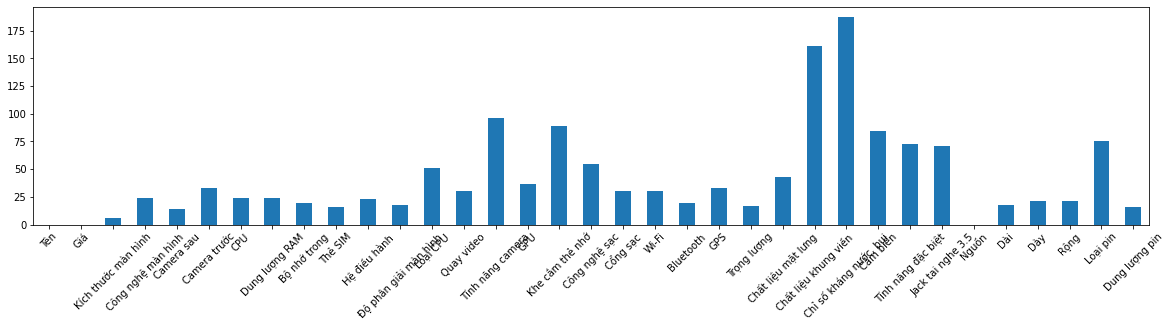

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,4))
df.isna().sum().plot.bar(x='index', y='n', rot=45)

In [ ]:
#chuyển dữ liệu dạng chữ về số sử dụng label encoding
def encode(df):
    df = df.copy()
    encoders = dict()
    for col_name in df.columns:
        series = df[col_name]
        label_encoder = preprocessing.LabelEncoder()
        df[col_name] = pd.Series(
            label_encoder.fit_transform(series[series.notnull()]),
            index=series[series.notnull()].index
        )
        encoders[col_name] = label_encoder
    return df, encoders

#dùng KNNImputer để fill nan
def fill(df):
    df = df.copy()

    imputer = KNNImputer()
    temp = imputer.fit_transform(df)

    df = pd.DataFrame(temp, columns=df.columns)
    return df

def decode(df, encoders):
    df = df.copy()
    for col_name in df.columns:
        series = df[col_name].apply(round)
        df[col_name] = pd.Series(
            encoders[col_name].inverse_transform(series))
    return df

In [ ]:
df_encoded, encoders = encode(df)
df_filled = fill(df_encoded)
df_decoded = decode(df_filled, encoders)

In [ ]:
df_decoded.to_excel('dienthoai_buoc5.xlsx',index=False)

In [ ]:
print("Tổng số điểm dữ liệu rỗng:",df_decoded.isna().sum().sum())

Tổng số điểm dữ liệu rỗng: 0


#Bước 6: Xử lí các thuộc tính dạng chữ có quá nhiều giá trị riêng biệt

##KNN

In [ ]:
#Đọc file lại vì các thuộc tính như dài, dày, rộng sẽ ở dạng float sau khi đọc
df_KNN=pd.read_excel("/content/dienthoai_select_KNN.xlsx")

In [ ]:
df_KNN.columns

Index(['Tên', 'Giá', 'Kích thước màn hình', 'Công nghệ màn hình',
       'Camera trước', 'Dung lượng RAM', 'Bộ nhớ trong', 'Thẻ SIM',
       'Hệ điều hành', 'Độ phân giải màn hình', 'GPU', 'Cổng sạc', 'Wi-Fi',
       'Bluetooth', 'GPS', 'Trọng lượng', 'Chất liệu khung viền',
       'Chỉ số kháng nước, bụi', 'Cảm biến', 'Tính năng đặc biệt',
       'Jack tai nghe 3.5', 'Dài', 'Dày', 'Rộng', 'Loại pin', 'Dung lượng pin',
       'Dài:Rộng', 'Dài:Dày', 'Rộng:Dày', 'Dài:Kích thước màn hình',
       'Dày:Kích thước màn hình', 'Dày:Trọng lượng',
       'Kích thước màn hình:Trọng lượng'],
      dtype='object')

In [ ]:
def flatten(t):
    return [item for sublist in t for item in sublist]

###Tên các cột cần xử lí

In [ ]:
for i in df_KNN.select_dtypes(include=['object']):
  if (df_KNN[i].nunique() > 40) and i!="Tên":
    print("{}: {}".format(i,df_KNN[i].nunique()))

Hệ điều hành: 52
GPU: 49
Wi-Fi: 52
Bluetooth: 44
GPS: 49
Tính năng đặc biệt: 77


###Hệ điều hành (Phân loại)

In [ ]:
word_list=[]
for row in df_KNN["Hệ điều hành"]:
  word=re.split(",",row)
  word_list.append(word)
  print(word)

['Android 11', ' One UI 3.0']
['Android 10']
['Android 11', ' One UI 3.0']
['Android 11', ' One UI 3.0']
['Android 11', ' MIUI 12.5']
['MIUI 12.5', ' Android 11']
['Android 10', ' One UI 2.5']
['iOS15']
['Android 10', ' One UI 2.5']
['Android 11']
['iOS15']
['iOS15']
['Android 11']
['Android 10', ' One UI 2.5']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS15']
['iOS15']
['Windows 10 Home']
['iOS15']
['iOS 15']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS15']
['iOS 15']
['Android 11']
['iOS 15']
['Android 11']
['ColorOS 11.2', ' nền tảng Android 11']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS15']
['Android 10', ' One UI 2.1']
['iOS15']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['Android 10', ' ROG UI']
['iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['Android 11', ' Redmagic 4.0']
['Android 11', ' Redmagic 4

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[('Android 11', 125),
 ('Android 10', 63),
 ('iOS15', 12),
 ('iOS 14', 9),
 (' MIUI 12.5', 8),
 (' Redmagic 4.0', 8),
 ('iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)', 7),
 ('iOS 15', 7),
 ('MIUI 12.5', 6),
 (' One UI 2.5', 6),
 ('Android 11 (Go Edition)', 6),
 (' One UI 3.0', 5),
 ('KaiOS', 5),
 ('iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)', 4),
 (' MIUI 12', 4),
 (' Realme UI R', 4),
 (' VOS 3.0', 4),
 (' EMUI 10.1', 4),
 (' no Google Play Services', 4),
 (' nền tảng Android 11', 3),
 (' Realme UI 2.0', 3),
 (' Funtouch OS 12 (phiên bản quốc tế)', 2),
 ('realme UI 1.0 - Android 10', 2),
 (' Funtouch 11.1', 2),
 (' Realme UI', 2),
 (' ColorOS 11.1', 2),
 ('Android Go', 2),
 ('Android 10.0 (Go edition)', 2),
 ('9', 2),
 ('Android 10 (Go Edition)', 2),
 (' Android 11', 1),
 ('Windows 10 Home', 1),
 ('ColorOS 11.2', 1),
 (' One UI 2.1', 1),
 (' ROG UI', 1),
 ('iOS 12', 1),
 (' ColorOS 11.3', 1),
 (' One UI 3.1', 1),
 ('ColorOS 7.2', 1),
 (' nền tảng Android 10', 1),
 ('Colo

In [ ]:
def preprocess_hdh(string_in):
    string_in=string_in.lower()
    hdh = "other"
    if 'android 11' in string_in:
        hdh = "Android 11"
    elif 'android 10' in string_in:
        hdh = "Android 10"
    elif 'ios15' in string_in:
        hdh = "iOS 15"
    elif 'ios 14' in string_in:
        hdh = "iOS 14"
    elif 'miui 12.5' in string_in:
        hdh = "MIUI 12.5"
    elif 'ios 15' in string_in:
        hdh = "iOS 15"
    elif 'redmagic 4.0' in string_in:
        hdh = "Redmagic 4.0"
    elif 'vos 3.0' in string_in:
        hdh = "VOS 3.0"

    return hdh

In [ ]:
hdh=[]
for row in df_KNN["Hệ điều hành"]:
  a=preprocess_hdh(row)
  hdh.append(a)

In [ ]:
df_KNN["Hệ điều hành"]=hdh

###GPS

In [ ]:
word_list=[]
for row in df_KNN["GPS"]:
  word=re.split(",",row)
  word_list.append(word)
  print(word)

['Có', ' hỗ trợ A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['Có', ' hỗ trợ A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['Có', ' hỗ trợ A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['A-GPS', ' GLONASS', ' BDS', ' GALILEO', ' QZSS']
['A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['A-GPS', ' GLONASS', ' GALILEO', ' QZSS']
['GPS/GNSS']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['Có', ' hỗ trợ A-GPS', ' GLONASS', ' GALILEO', ' BDS', ' QZSS']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['GPS', ' GLONASS', ' Galileo'

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' GLONASS', 205),
 ('A-GPS', 177),
 (' BDS', 166),
 (' GALILEO', 127),
 (' QZSS', 49),
 ('Có', 22),
 (' hỗ trợ A-GPS', 17),
 (' A-GPS', 17),
 ('GPS', 16),
 (' Galileo', 16),
 (' and BeiDou', 15),
 ('BDS', 12),
 ('A-GPS GLONASS', 11),
 (' iBeacon', 8),
 (' NavIC', 6),
 ('GPS/GNSS', 4),
 ('Yes', 4),
 (' with A-GPS', 3),
 ('GLONASS', 3),
 ('GALILEO', 3),
 (' hỗ trợ băng tần kép A-GPS', 2),
 ('Băng tầm kép A-GPS', 2),
 (' GLONASS/ BDS', 2),
 ('A-GPS BDS', 2),
 ('A-GPSBDS', 2),
 ('GALILEO GLONASS', 2),
 (' hỗ trợ 2 băng tần A-GPS', 1),
 ('dual-band A-GPS', 1),
 (' GNSS', 1),
 (' Glonass', 1),
 (' Beidou', 1),
 (' with dual-band A-GPS', 1),
 ('Đang cập nhật', 1),
 ('A-GPS GALILEO GLONASS BDS', 1),
 ('GALILEO ', 1),
 (' GALILE', 1),
 ('GPS/Glonass/Beidou/Galileo', 1),
 ('', 1),
 ('QZSS', 1)]

In [ ]:
def preprocess_GPS(string_in):
    string_in=string_in.lower()
    glonass = 0
    if 'glonass' in string_in:
        glonass = 1

    a_gps = 0
    if 'a-gps' in string_in:
        a_gps = 1

    bds = 0
    if 'bds' in string_in:
        bds = 1

    galileo = 0
    if 'galileo' in string_in:
        galileo = 1

    return glonass, a_gps, bds, galileo

In [ ]:
glonass=[]
a_gps=[]
bds=[]
galileo=[]
for row in df_KNN["GPS"]:
  glo,a_,bd,gal=preprocess_GPS(row)
  glonass.append(glo)
  a_gps.append(a_)
  bds.append(bd)
  galileo.append(gal)

In [ ]:
df_KNN["GPS_hỗ trợ GLONASS"]=glonass
df_KNN["GPS_hỗ trợ A-GPS"]=a_gps
df_KNN["GPS_hỗ trợ BDS"]=bds
df_KNN["GPS_hỗ trợ GALILEO"]=galileo

In [ ]:
df_KNN.drop(axis=1,columns=["GPS"],inplace=True)

###Tính năng đặc biệt

In [ ]:
word_list=[]
for row in df_KNN["Tính năng đặc biệt"]:
  word=re.split(",",row)
  word_list.append(word)
  print(word)

['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt', ' Bảo mật vân tay']
['Chặn cuộc gọi', ' Chặn tin nhắn', ' Ghi âm cuộc gọi', ' Ứng dụng kép (Nhân bản ứng dụng)']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Bảo mật vân tay']
['Chế độ trẻ em (Không gian trẻ em)', ' Tối ưu game (Không gian trò chơi)', ' Ứng dụng kép (Nhân bản ứng dụng)']
['Ghi âm cuộc gọi', ' Âm thanh Dolby Audio', ' Ứng dụng kép (Nhân bản ứng dụng)']
['Hỗ trợ 5G', ' Sạc không dây', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt']
['Hỗ trợ 5G', ' Sạc không dây', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhậ

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' Ứng dụng kép (Nhân bản ứng dụng)', 83),
 (' Chặn tin nhắn', 58),
 ('Hỗ trợ 5G', 49),
 (' Ghi âm cuộc gọi', 49),
 ('Chặn cuộc gọi', 45),
 (' Sạc không dây', 43),
 (' kháng bụi', 42),
 (' Nhận diện khuôn mặt', 41),
 (' Bảo mật vân tay', 41),
 ('Ghi âm cuộc gọi', 41),
 (' Kháng nước', 31),
 (' Tối ưu game (Không gian trò chơi)', 23),
 (' Đa cửa sổ (chia đôi màn hình)', 19),
 (' Chế độ trẻ em (Không gian trẻ em)', 19),
 (' Chặn cuộc gọi', 16),
 (' Tối ưu game (Game Booster)', 16),
 (' Âm thanh Dolby Audio', 15),
 ('Bảo mật vân tay', 15),
 ('Nhận diện khuôn mặt', 13),
 (' Màn hình luôn hiển thị AOD', 13),
 ('Kháng nước', 11),
 (' Ứng dụng kép (Dual Messenger)', 11),
 (' Tối ưu game (Siêu trò chơi)', 10),
 ('Chặn cuộc gọi Chặn tin nhắn', 10),
 ('Chạm 2 lần sáng màn hình', 10),
 (' Âm thanh bởi Harman Kardon', 9),
 (' Không gian thứ hai', 9),
 (' Chế độ trẻ em (Samsung Kids)', 9),
 (' Trợ lý ảo Samsung Bixby', 9),
 (' Không gian thứ hai (Thư mục bảo mật)', 8),
 (' Samsung Pay', 8),
 ('Ghi

In [ ]:
def preprocess_tndb(string_in):
    string_in=string_in.lower()
    ung_dung_kep = 0
    if 'ứng dụng kép' in string_in:
        ung_dung_kep = 1

    chan_tin_nhan = 0
    if 'chặn tin nhắn' in string_in:
        chan_tin_nhan = 1

    mang_5g = 0
    if 'hỗ trợ 5g' in string_in:
        g = 1

    ghi_am = 0
    if 'ghi âm cuộc gọi' in string_in:
        ghi_am = 1
    
    chan_goi = 0
    if 'chặn cuộc gọi' in string_in:
        chan_goi = 1

    khang_bui = 0
    if 'kháng bụi' in string_in:
        khang_bui = 1

    sac_khong_day = 0
    if 'sạc không dây' in string_in:
        sac_khong_day = 1

    khuon_mat = 0
    if 'nhận diện khuôn mặt' in string_in:
        khuon_mat = 1
    
    van_tay = 0
    if 'bảo mật vân tay' in string_in:
        van_tay = 1
    
    khang_nuoc = 0
    if 'kháng nước' in string_in:
        khang_nuoc = 1

    return ung_dung_kep, chan_tin_nhan, mang_5g, ghi_am, chan_goi, khang_bui, sac_khong_day, khuon_mat, van_tay, khang_nuoc

In [ ]:
ung_dung_kep=[]#a
chan_tin_nhan=[]#b 
mang_5g=[]#c
ghi_am=[]#d
chan_goi=[]#e
khang_bui=[]#f 
sac_khong_day=[]#g 
khuon_mat=[]#h 
van_tay=[]#i 
khang_nuoc=[]#k
for row in df_KNN["Tính năng đặc biệt"]:
  a,b,c,d,e,f,g,h,i,k=preprocess_tndb(row)
  ung_dung_kep.append(a)
  chan_tin_nhan.append(b)
  mang_5g.append(c)
  ghi_am.append(d)
  chan_goi.append(e)
  khang_bui.append(f) 
  sac_khong_day.append(g) 
  khuon_mat.append(h) 
  van_tay.append(i) 
  khang_nuoc.append(k)

In [ ]:
df_KNN["Ứng dụng kép"]=ung_dung_kep
df_KNN["Chặn tin nhắn"]=chan_tin_nhan
df_KNN["5g"]=mang_5g
df_KNN["Ghi âm"]=ghi_am
df_KNN["Chặn gọi"]=chan_goi
df_KNN["Kháng bụi"]=khang_bui
df_KNN["Sạc không dây"]=sac_khong_day
df_KNN["Khuôn mặt"]=khuon_mat
df_KNN["Vân tay"]=van_tay
df_KNN["Kháng nước"]=khang_nuoc

In [ ]:
df_KNN.drop(axis=1,columns=["Tính năng đặc biệt"],inplace=True)

###Bluetooth

In [ ]:
word_list=[]
for row in df_KNN["Bluetooth"]:
  word=re.split(",",row)
  word_list.append(word)
  print(word)

['5.1', ' A2DP', ' LE5.2', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['Bluetooth 5.2']
['5.1']
['5.0', ' A2DP', ' LE', ' aptX HD']
['5.0']
['5.0', ' A2DP', ' LE', ' aptX HD']
['5.0']
['5.0']
['5.0']
['5.0']
['5.0', ' A2DP', ' LE', ' aptX HD']
['5.0', ' A2DP', ' LE']
['5.0']
['5.0']
['5.0']
['5.1']
['5.0']
['5.0']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.0']
['5.0']
['5.1']
['5.0']
['5.1']
['5.2', ' A2DP', ' LE', ' aptX HD']
['5.0', ' A2DP', ' LE']
['5.0']
['5.0', ' A2DP', ' LE', ' aptX']
['5.0']
['5.0', ' A2DP', ' LE']
['5.1', ' A2DP', ' LE', ' aptX HD', ' aptX Adaptive']
['5.0']
['5.1', ' A2DP', ' aptX', ' LE']
['5.2', ' A2DP', ' aptX', ' LE']
['5.1']
['5.1', ' A2DP', ' aptX', ' LE']
['5.0']
['5.0']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.2', ' A2DP', ' aptX', ' LE']
['5.2']
['5.2', ' A2DP', ' LE', ' aptX HD', ' aptX Adaptive']
['5.0', ' A2DP', ' LE']
['5.1', ' A2DP', ' LE', ' aptX HD']
['5.0', ' A2DP', ' LE']
['5.0'

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' LE', 145),
 ('5.0', 86),
 (' A2DP', 82),
 ('A2DP', 78),
 ('5.1', 46),
 (' 5.0', 44),
 (' 5.1', 34),
 ('Có', 11),
 (' aptX', 10),
 (' aptX HD', 9),
 (' apt-X', 8),
 ('4.2', 7),
 ('5.2', 6),
 (' LE5.2', 5),
 (' aptX Adaptive', 4),
 ('A2DP LE', 4),
 ('A2DP 4.2', 4),
 ('A2DP 5.0', 4),
 (' EDR', 3),
 ('5.0 A2DP', 3),
 ('Bluetooth 5.2', 2),
 ('3.0', 2),
 ('Yes 5.0', 2),
 ('LE', 2),
 (' 4.2', 2),
 ('v4.3', 2),
 ('v4.0', 2),
 ('4.1', 1),
 ('LE 5.1 A2DP', 1),
 ('4.0', 1),
 ('A2DPLE', 1),
 ('LE 5.0', 1)]

In [ ]:
def preprocess_bluetooth(string_in):
    string_in=string_in.lower()
    le = 0
    if 'le' in string_in:
        le = 1

    A2DP = 0
    if 'a2dp' in string_in:
        A2DP = 1

    b50 = 0
    if '5.0' in string_in:
        b50 = 1

    b51 = 0
    if '5.1' in string_in:
        b51 = 1
       
    return le,A2DP,b50,b51

In [ ]:
le=[]
A2DP=[]
b50=[]
b51=[]
for row in df_KNN["Bluetooth"]:
  a,b,c,d=preprocess_bluetooth(row)
  le.append(a)
  A2DP.append(b)
  b50.append(c)
  b51.append(d)
  

In [ ]:
df_KNN["Bluetooth_LE"]=le
df_KNN["Bluetooth_A2DP"]=A2DP
df_KNN["Bluetooth_5.0"]=b50
df_KNN["Bluetooth_5.1"]=b51

In [ ]:
df_KNN.drop(axis=1,columns=["Bluetooth"],inplace=True)

###Wi-Fi

In [ ]:
word_list=[]
for row in df_KNN["Wi-Fi"]:
  word=re.split(",",row)
  word_list.append(word)
  print(word)

['Wi-Fi 802.11 a/b/g/n/ac/6e', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 b/g/n', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 6']
['Wi-Fi 6']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Dual-band (2.4 GHz/5 GHz) Wi-Fi 802.11 a/b/g/n/ac/ax Wi-Fi MIMO Wi-Fi hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/ax', ' HE80', ' MIMO', ' 1024-QAM']
['WiFi 6E']
['WiFi 6E']
['Wi-Fi 802.11 a/b/g/n/ac/ax', ' HE80', ' MIMO', ' 1024-QAM']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' hotspot']
['802.11ax Wi‑Fi 6 with 2x2 MIMO']
['WiFi 6E']
['WiFi 6E']
['802.11ax 2x2']
['WiFi 6E']
['Wi‑Fi 6 (802.11ax)']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' 

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' Wi-Fi Direct', 151),
 (' Wi-Fi hotspot', 106),
 ('Dual-band (2.4 GHz/5 GHz)', 81),
 (' hotspot', 74),
 (' dual-band', 60),
 (' Wi-Fi 802.11 a/b/g/n/ac', 59),
 ('Wi-Fi 802.11 a/b/g/n/ac', 36),
 (' Wi-Fi 802.11 a/b/g/n/ac/ax', 28),
 ('Wi-Fi 802.11 a/b/g/n', 26),
 ('Wi-Fi 802.11 a/b/g/n/ac/6', 23),
 ('Wi-Fi 802.11 b/g/n', 20),
 (' Dual-band (2.4 GHz/5 GHz)', 15),
 ('Wi-Fi 802.11 a/b/g/n Wi-Fi hotspot', 13),
 ('WiFi 6E', 11),
 ('Wi-Fi hotspot', 11),
 (' Wi-Fi MIMO', 9),
 ('Wi-Fi 802.11 a/b/g/n/ac/ax', 8),
 (' WiFi Direct', 7),
 ('Wi-Fi 6', 4),
 (' HE80', 4),
 (' MIMO', 4),
 (' 1024-QAM', 4),
 ('802.11ax Wi‑Fi 6 with 2x2 MIMO', 4),
 ('Wi-Fi 802.11 a/b/g/n/ac/6e', 3),
 ('Wi‑Fi 6 (802.11ax)', 3),
 (' băng tần kép', 3),
 ('802.11 a/b/g/n/ac', 3),
 ('Wi-Fi 802.11 b/g/n Wi-Fi hotspot', 3),
 (' 2 ăng-ten', 2),
 (' điểm truy cập cá nhân', 2),
 ('IEEE 802.11 a/b/g/n/ac (2.4GHz+5GHz)', 2),
 (' Wi-Fi hotspots', 2),
 (' Wi-Fi Direct ', 2),
 ('Wi-Fi 802.11', 2),
 (' b/g/n', 2),
 ('Wi-Fi Direct', 2)

In [ ]:
def preprocess_wifi(string_in):
    string_in=string_in.lower()
    direct = 0
    if 'wi-fi direct' in string_in:
        direct = 1

    hotspot = 0
    if 'hotspot' in string_in:
        hotspot = 1

    dual_band = 0
    if 'dual-band' in string_in:
        dual_band = 1

    ac = 0
    if 'wi-fi 802.11 a/b/g/n/ac' in string_in:
        ac = 1

    ac_ax = 0
    if 'wi-fi 802.11 a/b/g/n/ac/ax' in string_in:
        ac_ax = 1
       
    return direct,hotspot,dual_band,ac,ac_ax

In [ ]:
direct=[]
hotspot=[]
dual_band=[]
ac=[]
ac_ax=[]
for row in df_KNN["Wi-Fi"]:
  a,b,c,d,e=preprocess_wifi(row)
  direct.append(a)
  hotspot.append(b)
  dual_band.append(c)
  ac.append(d)
  ac_ax.append(e)
  

In [ ]:
df_KNN["Wi-Fi Direct"]=direct
df_KNN["Wi-Fi Hotspot"]=hotspot
df_KNN["Wi-Fi Dual-band"]=dual_band
df_KNN["Wi-Fi 802.11 a/b/g/n/ac"]=ac
df_KNN["Wi-Fi 802.11 a/b/g/n/ac/ax"]=ac_ax

In [ ]:
df_KNN.drop(axis=1,columns=["Wi-Fi"],inplace=True)

###GPU

In [ ]:
word_list=[]
for row in df_KNN["GPU"]:
  word=re.split(",",row)
  word_list.append(word)
  print(word)

['Arm Mali-G78', ' 14 nhân']
['PowerVR GE8320']
['Mali-G78 MP14']
['Mali-G78 MP14']
['Adreno 650']
['Adreno™ 642L']
['Adreno 650']
['GPU 5 nhân']
['Adreno 650']
['Adreno 660']
['GPU 5 nhân']
['GPU 5 nhân']
['Adreno 660']
['Adreno 650']
['Apple GPU (4-core graphics)']
['Apple GPU']
['GPU 5 nhân']
['GPU 5 nhân']
['Adreno 660']
['GPU 5 nhân']
['GPU 4 nhân']
['Apple GPU (4-core graphics)']
['Apple GPU (4-core graphics)']
['GPU 4 nhân']
['GPU 4 nhân']
['Adreno 660']
['GPU 4 nhân']
['Adreno 660l']
['Adreno 660']
['Apple GPU (4-core graphics)']
['GPU 4 nhân']
['Mali-G77 MP11']
['GPU 4 nhân']
['Apple GPU (4-core graphics)']
['Adreno 650']
['Apple GPU']
['Adreno 660']
['Adreno 660']
['Mali-G78 MP10']
['Adreno 660']
['Apple GPU']
['Apple GPU']
['Apple GPU (4-core graphics)']
['Apple GPU (4-core graphics)']
['Adreno 660']
['Adreno 660']
['Adreno 660']
['Apple GPU 4 nhân']
['PowerVR GM9446']
['Adreno 650']
['Apple GPU']
['Adreno 642L']
['Adreno 618']
['Mali-G57 MC3']
['Adreno 620']
['Adreno 618']


In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[('Adreno 618', 21),
 ('IMG PowerVR GE8320', 21),
 ('Adreno 660', 19),
 ('GPU 4 nhân', 19),
 ('Mali-G52', 17),
 ('Adreno 610', 16),
 ('Mali-G52 MC2', 15),
 ('Apple GPU 4 nhân', 13),
 ('Adreno 650', 10),
 ('GPU 5 nhân', 8),
 ('Mali-G57 MC2', 8),
 ('Apple GPU (4-core graphics)', 7),
 ('Apple GPU', 7),
 ('Mali-G76 MC4', 7),
 ('Mali-G78 MP14', 6),
 ('PowerVR GE8320', 5),
 ('Adreno 619', 5),
 ('Adreno 642L', 4),
 ('IMG 8322', 4),
 ('Mali-400 MP2', 4),
 ('Mali-G57 MC3', 3),
 ('Adreno 620', 3),
 ('Mali-G72', 3),
 ('IMG PowerVR GE8322', 3),
 ('Mali-T820 MP1', 3),
 ('Arm Mali-G78', 2),
 (' 14 nhân', 2),
 ('Mali-G77 MP11', 2),
 ('Mali-G57MP4', 2),
 ('PowerVR GE8100', 2),
 ('Mali-G68 MC4', 2),
 ('Mali-G77 MP9', 2),
 ('Mali-G77 MC9', 2),
 ('Apple GPU 5 nhân', 2),
 ('IMG PowerVR GM9446', 2),
 ('Adreno 506', 2),
 ('Adreno 304', 2),
 ('Adreno™ 642L', 1),
 ('Adreno 660l', 1),
 ('Mali-G78 MP10', 1),
 ('PowerVR GM9446', 1),
 ('Mali-T720 MP2', 1),
 ('Mali-G52 MC2aAdreno 610', 1),
 ('ARM G76', 1),
 ('ARM 

In [ ]:
def preprocess_gpu(string_in):
    string_in=string_in.lower()
    gpu = 'Others'
    if 'adreno' in string_in:
          gpu = 'Adreno'
    elif 'mali' in string_in:
          gpu = 'Mali'
    elif 'igm' in string_in:
          gpu = 'IGM'
    elif 'apple' in string_in:
          gpu = 'Apple'
    
    return gpu

In [ ]:
gpu = []
for row in df_KNN["GPU"]:
  a =preprocess_gpu(row)
  gpu.append(a)

In [ ]:
df_KNN["GPU"] = gpu


In [ ]:
len(df_KNN.columns)

52

In [ ]:
df_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Tên                              266 non-null    object 
 1   Giá                              266 non-null    int64  
 2   Kích thước màn hình              266 non-null    float64
 3   Công nghệ màn hình               266 non-null    object 
 4   Camera trước                     266 non-null    object 
 5   Dung lượng RAM                   266 non-null    object 
 6   Bộ nhớ trong                     266 non-null    object 
 7   Thẻ SIM                          266 non-null    object 
 8   Hệ điều hành                     266 non-null    object 
 9   Độ phân giải màn hình            266 non-null    object 
 10  GPU                              266 non-null    object 
 11  Cổng sạc                         266 non-null    object 
 12  Trọng lượng           

###to_excel

In [ ]:
df_KNN.to_excel("KNN.xlsx",index=False)

##-1

In [ ]:
df_value=pd.read_excel("/content/dienthoai_select_value.xlsx")

###Tên các cột cần xử lí

In [ ]:
for i in df_value.select_dtypes(include=['object']):
  if (df_value[i].nunique() > 40) and i!="Tên":
    print("{}: {}".format(i,df_value[i].nunique()))

Hệ điều hành: 53
Quay video: 105
GPU: 50
Wi-Fi: 53
Bluetooth: 45
GPS: 50
Tính năng đặc biệt: 78


###Quay video

In [ ]:
df_value["Quay video"].unique()

array(['8K ở tốc độ 24fps, 4K ở tốc độ 30/60fps, 1080p ở tốc độ 30/60/240fps, 720p ở tốc độ 960fps, hỗ trợ HDR10+, chống rung OIS',
       '1080p@30fps',
       '8K@24fps, 4K@30/60fps, 1080p@30/60/240fps, 720p@960fps, HDR10+, stereo sound rec., gyro-EIS',
       '4K@30fps, 1080p@30/60fps, 720p@30fps',
       'Trước: 4K@30fps, 1080p@30fps, gyro-EIS Sau: 4K@60fps, 1080p@60/240fps (gyro-EIS), 720p@960fps (gyro-EIS), HDR10+',
       '4K @24 fps/25 fps/30 fps/ 60 fps 1080p HD @25 fps/30 fps/60 fps 720p HD@ 30 fps',
       '4K@60fps, 1080p@60/240fps (gyro-EIS), 720p@960fps (gyro-EIS), HDR10+',
       'Trước: 4K@24/30/60fps, 1080p@30/60/120fps, gyro-EIS Sau: 4K@24/30/60fps, 1080p@30/60/120/240fps, HDR, Dolby Vision HDR (up to 60fps), stereo sound rec.',
       'Quay video 4K ở tốc độ 24 fps, 30 fps hoặc 60 fps', -1,
       '4K 2160p@30fps FullHD 1080p@30fps FullHD 1080p@60fps HD 720p@30fps',
       'Sau: 4K@24/30/60fps, 1080p@30/60/120/240fps, HDR, Dolby Vision HDR (up to 60fps), stereo sound

In [ ]:
word_list=[]
for row in df_value["Quay video"]:
  try:
    word=re.split(",",row)
    word_list.append(word)
    print(word)
  except:
    word_list.append("-1")
    print("pass")

['8K ở tốc độ 24fps', ' 4K ở tốc độ 30/60fps', ' 1080p ở tốc độ 30/60/240fps', ' 720p ở tốc độ 960fps', ' hỗ trợ HDR10+', ' chống rung OIS']
['1080p@30fps']
['8K@24fps', ' 4K@30/60fps', ' 1080p@30/60/240fps', ' 720p@960fps', ' HDR10+', ' stereo sound rec.', ' gyro-EIS']
['8K@24fps', ' 4K@30/60fps', ' 1080p@30/60/240fps', ' 720p@960fps', ' HDR10+', ' stereo sound rec.', ' gyro-EIS']
['4K@30fps', ' 1080p@30/60fps', ' 720p@30fps']
['4K@30fps', ' 1080p@30/60fps', ' 720p@30fps']
['Trước: 4K@30fps', ' 1080p@30fps', ' gyro-EIS Sau: 4K@60fps', ' 1080p@60/240fps (gyro-EIS)', ' 720p@960fps (gyro-EIS)', ' HDR10+']
['4K @24 fps/25 fps/30 fps/ 60 fps 1080p HD @25 fps/30 fps/60 fps 720p HD@ 30 fps']
['Trước: 4K@30fps', ' 1080p@30fps', ' gyro-EIS Sau: 4K@60fps', ' 1080p@60/240fps (gyro-EIS)', ' 720p@960fps (gyro-EIS)', ' HDR10+']
['4K@60fps', ' 1080p@60/240fps (gyro-EIS)', ' 720p@960fps (gyro-EIS)', ' HDR10+']
['4K @24 fps/25 fps/30 fps/ 60 fps 1080p HD @25 fps/30 fps/60 fps 720p HD@ 30 fps']
['4K @2

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' FullHD 1080p@30fps', 58),
 (' FullHD 1080p@60fps', 54),
 (' HD 720p@30fps', 45),
 ('4K 2160p@30fps', 43),
 ('-', 30),
 ('1', 30),
 ('FullHD 1080p@30fps', 30),
 (' FullHD 1080p@120fps', 26),
 ('FullHD 1080p@30fps HD 720p@30fps', 26),
 (' FullHD 1080p@240fps', 22),
 (' 4K 2160p@60fps', 22),
 (' HD 720p@60fps', 20),
 (' HD 720p@240fps', 17),
 ('1080p@30fps', 16),
 (' HD 720p@960fps', 15),
 ('4K@30fps', 13),
 (' 4K 2160p@30fps', 13),
 (' HD 720p@120fps', 13),
 (' 1080p@30/60/120/240fps', 11),
 (' stereo sound rec.', 10),
 (' gyro-EIS', 10),
 (' 1080p@30fps', 10),
 (' HDR10+', 9),
 (' 1080p@30/60/120fps', 9),
 ('4K 2160p@30fps FullHD 1080p@30fps FullHD 1080p@60fps HD 720p@30fps', 9),
 ('4K 2160p@24fps', 9),
 (' HDR', 8),
 ('Có quay phim', 8),
 (' 4K@30/60fps', 7),
 (' 1080p@30/60fps', 7),
 (' 720p@960fps', 6),
 ('4K @24 fps/25 fps/30 fps/ 60 fps 1080p HD @25 fps/30 fps/60 fps 720p HD@ 30 fps',
  6),
 ('4K 2160p@60fps', 6),
 (' 1080p@60/240fps (gyro-EIS)', 5),
 (' 720p@960fps (gyro-EIS)'

In [ ]:
def preprocess_quayvideo(string_in):
    try:
      string_in=string_in.lower()
      video = "other"
      if any(w in string_in for w in ('8k', '4320p')):
        video="8K"
      elif any(w in string_in for w in ('4k', '2160p')):
        video="4K"
      elif any(w in string_in for w in ('2k', '1440p')):
        video="2K"
      elif any(w in string_in for w in ('full hd', 'fullhd', '1080p')):
        video="1080p"
      elif any(w in string_in for w in ('hd', '720p')):
        video="720p"
      elif '480p' in string_in:
        video="480p"
    except:
      video = "other"
    return video

In [ ]:
video=[]
for row in df_value["Quay video"]:
  a=preprocess_quayvideo(row)
  video.append(a)

  

In [ ]:
df_value["Quay video"]=video

In [ ]:
df_value["Quay video"].unique()

array(['8K', '1080p', '4K', 'other', '720p'], dtype=object)

In [ ]:
len(df_value.columns)

35

###Hệ điều hành (Phân loại)

In [ ]:
word_list=[]
for row in df_value["Hệ điều hành"]:
  try:
    word=re.split(",",row)
    word_list.append(word)
    print(word)
  except:
    word_list.append("-1")
    print("pass")

['Android 11', ' One UI 3.0']
['Android 10']
['Android 11', ' One UI 3.0']
['Android 11', ' One UI 3.0']
['Android 11', ' MIUI 12.5']
['MIUI 12.5', ' Android 11']
['Android 10', ' One UI 2.5']
['iOS15']
['Android 10', ' One UI 2.5']
['Android 11']
['iOS15']
['iOS15']
['Android 11']
['Android 10', ' One UI 2.5']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS15']
['iOS15']
['Windows 10 Home']
['iOS15']
['iOS 15']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS15']
['iOS 15']
['Android 11']
['iOS 15']
['Android 11']
['ColorOS 11.2', ' nền tảng Android 11']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['iOS15']
['Android 10', ' One UI 2.1']
['iOS15']
['iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['Android 10', ' ROG UI']
['iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)']
['Android 11', ' Redmagic 4.0']
['Android 11', ' Redmagic 4

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[('Android 11', 112),
 ('Android 10', 57),
 ('-', 23),
 ('1', 23),
 ('iOS15', 12),
 ('iOS 14', 9),
 ('iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)', 7),
 ('iOS 15', 7),
 (' One UI 3.0', 5),
 ('KaiOS', 5),
 ('Android 11 (Go Edition)', 5),
 (' MIUI 12.5', 4),
 (' One UI 2.5', 4),
 ('iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)', 4),
 (' Redmagic 4.0', 4),
 ('MIUI 12.5', 3),
 (' nền tảng Android 11', 3),
 (' Realme UI 2.0', 3),
 (' MIUI 12', 3),
 (' EMUI 10.1', 3),
 (' no Google Play Services', 3),
 ('realme UI 1.0 - Android 10', 2),
 (' Funtouch 11.1', 2),
 (' Realme UI', 2),
 ('Android Go', 2),
 (' VOS 3.0', 2),
 ('Android 10.0 (Go edition)', 2),
 ('9', 2),
 ('Android 10 (Go Edition)', 2),
 (' Android 11', 1),
 ('Windows 10 Home', 1),
 ('ColorOS 11.2', 1),
 (' One UI 2.1', 1),
 (' ROG UI', 1),
 (' Funtouch OS 12 (phiên bản quốc tế)', 1),
 ('iOS 12', 1),
 (' ColorOS 11.3', 1),
 (' One UI 3.1', 1),
 ('ColorOS 7.2', 1),
 (' nền tảng Android 10', 1),
 ('ColorOS 11.3', 1),
 (' Ox

In [ ]:
def preprocess_hdh(string_in):
  try:
    string_in=string_in.lower()
    hdh = "other"
    if 'android 11' in string_in:
        hdh = "Android 11"
    elif 'android 10' in string_in:
        hdh = "Android 10"
    elif 'ios15' in string_in:
        hdh = "iOS 15"
    elif 'ios 14' in string_in:
        hdh = "iOS 14"
    elif 'miui 12.5' in string_in:
        hdh = "MIUI 12.5"
    elif 'ios 15' in string_in:
        hdh = "iOS 15"
    elif 'redmagic 4.0' in string_in:
        hdh = "Redmagic 4.0"
    elif 'vos 3.0' in string_in:
        hdh = "VOS 3.0"
  except:
    hdh = "other"
  return hdh

In [ ]:
hdh=[]
for row in df_value["Hệ điều hành"]:
  a=preprocess_hdh(row)
  hdh.append(a)

In [ ]:
df_value["Hệ điều hành"]=hdh

###GPS

In [ ]:
word_list=[]
for row in df_value["GPS"]:
  try:
    word=re.split(",",row)
    word_list.append(word)
    print(word)
  except:
    word_list.append("-1")
    print("pass")

['Có', ' hỗ trợ A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['Có', ' hỗ trợ A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['Có', ' hỗ trợ A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['A-GPS', ' GLONASS', ' BDS', ' GALILEO', ' QZSS']
['A-GPS', ' GLONASS', ' BDS', ' GALILEO']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['A-GPS', ' GLONASS', ' GALILEO', ' BDS']
['A-GPS', ' GLONASS', ' GALILEO', ' QZSS']
['GPS/GNSS']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
pass
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['GPS', ' GLONASS', ' Galileo', ' QZSS', ' and BeiDou']
['A-GPS', ' GLONASS', ' GALILEO', 

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' GLONASS', 175),
 ('A-GPS', 156),
 (' BDS', 146),
 (' GALILEO', 109),
 (' QZSS', 41),
 ('-', 33),
 ('1', 33),
 ('Có', 19),
 ('GPS', 16),
 (' Galileo', 16),
 (' and BeiDou', 15),
 (' hỗ trợ A-GPS', 14),
 (' A-GPS', 11),
 ('A-GPS GLONASS', 11),
 (' iBeacon', 6),
 ('BDS', 6),
 ('GPS/GNSS', 4),
 ('Yes', 4),
 (' with A-GPS', 3),
 ('GLONASS', 3),
 ('GALILEO', 3),
 (' hỗ trợ băng tần kép A-GPS', 2),
 (' NavIC', 2),
 ('GALILEO GLONASS', 2),
 (' hỗ trợ 2 băng tần A-GPS', 1),
 ('dual-band A-GPS', 1),
 (' GNSS', 1),
 ('Băng tầm kép A-GPS', 1),
 (' Glonass', 1),
 (' Beidou', 1),
 (' with dual-band A-GPS', 1),
 (' GLONASS/ BDS', 1),
 ('Đang cập nhật', 1),
 ('A-GPS GALILEO GLONASS BDS', 1),
 ('GALILEO ', 1),
 (' GALILE', 1),
 ('GPS/Glonass/Beidou/Galileo', 1),
 ('', 1),
 ('A-GPSBDS', 1),
 ('QZSS', 1),
 ('A-GPS BDS', 1)]

In [ ]:
def preprocess_GPS(string_in):
  try:
    string_in=string_in.lower()
    glonass = 0
    if 'glonass' in string_in:
        glonass = 1

    a_gps = 0
    if 'a-gps' in string_in:
        a_gps = 1

    bds = 0
    if 'bds' in string_in:
        bds = 1

    galileo = 0
    if 'galileo' in string_in:
        galileo = 1
  except:
    glonass=0
    a_gps=0
    bds=0
    galileo=0
  return glonass, a_gps, bds, galileo

In [ ]:
glonass=[]
a_gps=[]
bds=[]
galileo=[]
for row in df_value["GPS"]:
  glo,a_,bd,gal=preprocess_GPS(row)
  glonass.append(glo)
  a_gps.append(a_)
  bds.append(bd)
  galileo.append(gal)

In [ ]:
df_value["GPS_hỗ trợ GLONASS"]=glonass
df_value["GPS_hỗ trợ A-GPS"]=a_gps
df_value["GPS_hỗ trợ BDS"]=bds
df_value["GPS_hỗ trợ GALILEO"]=galileo

In [ ]:
df_value.drop(axis=1,columns=["GPS"],inplace=True)

###Tính năng đặc biệt

In [ ]:
word_list=[]
for row in df_value["Tính năng đặc biệt"]:
  try:
    word=re.split(",",row)
    word_list.append(word)
    print(word)
  except:
    word_list.append("-1")
    print("pass")

['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt', ' Bảo mật vân tay']
pass
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Bảo mật vân tay']
pass
pass
['Hỗ trợ 5G', ' Sạc không dây', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt']
['Hỗ trợ 5G', ' Sạc không dây', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Sạc không dây', ' Bảo mật vân tay']
['Hỗ trợ 5G', ' Kháng nước', ' kháng bụi', ' Sạc không dây', ' Nhận diện khuôn mặt']
['Kháng nước

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[('-', 73),
 ('1', 73),
 ('Hỗ trợ 5G', 41),
 (' Sạc không dây', 39),
 (' kháng bụi', 38),
 (' Ứng dụng kép (Nhân bản ứng dụng)', 38),
 (' Nhận diện khuôn mặt', 37),
 (' Bảo mật vân tay', 35),
 (' Ghi âm cuộc gọi', 29),
 (' Kháng nước', 28),
 (' Chặn tin nhắn', 28),
 ('Ghi âm cuộc gọi', 24),
 ('Chặn cuộc gọi', 18),
 ('Bảo mật vân tay', 15),
 ('Nhận diện khuôn mặt', 13),
 (' Chặn cuộc gọi', 13),
 (' Đa cửa sổ (chia đôi màn hình)', 13),
 (' Màn hình luôn hiển thị AOD', 12),
 (' Chế độ trẻ em (Không gian trẻ em)', 12),
 (' Tối ưu game (Không gian trò chơi)', 12),
 (' Ứng dụng kép (Dual Messenger)', 11),
 ('Kháng nước', 10),
 ('Chặn cuộc gọi Chặn tin nhắn', 9),
 (' Tối ưu game (Game Booster)', 9),
 ('Chạm 2 lần sáng màn hình', 9),
 (' Âm thanh Dolby Audio', 8),
 (' Chế độ trẻ em (Samsung Kids)', 7),
 (' Trợ lý ảo Samsung Bixby', 7),
 (' Samsung Pay', 7),
 (' Thu nhỏ màn hình sử dụng một tay', 7),
 (' Không gian thứ hai (Thư mục bảo mật)', 6),
 (' Âm thanh AKG', 6),
 (' Tối ưu game (Siêu trò

In [ ]:
def preprocess_tndb(string_in):
  try:
    string_in=string_in.lower()
    ung_dung_kep = 0
    if 'ứng dụng kép' in string_in:
        ung_dung_kep = 1

    chan_tin_nhan = 0
    if 'chặn tin nhắn' in string_in:
        chan_tin_nhan = 1

    mang_5g = 0
    if 'hỗ trợ 5g' in string_in:
        g = 1

    ghi_am = 0
    if 'ghi âm cuộc gọi' in string_in:
        ghi_am = 1
    
    chan_goi = 0
    if 'chặn cuộc gọi' in string_in:
        chan_goi = 1

    khang_bui = 0
    if 'kháng bụi' in string_in:
        khang_bui = 1

    sac_khong_day = 0
    if 'sạc không dây' in string_in:
        sac_khong_day = 1

    khuon_mat = 0
    if 'nhận diện khuôn mặt' in string_in:
        khuon_mat = 1
    
    van_tay = 0
    if 'bảo mật vân tay' in string_in:
        van_tay = 1
    
    khang_nuoc = 0
    if 'kháng nước' in string_in:
        khang_nuoc = 1
  except:
    ung_dung_kep=0
    chan_tin_nhan=0
    mang_5g=0
    ghi_am=0 
    chan_goi=0
    khang_bui=0
    sac_khong_day=0
    khuon_mat=0 
    van_tay=0 
    khang_nuoc=0
  return ung_dung_kep, chan_tin_nhan, mang_5g, ghi_am, chan_goi, khang_bui, sac_khong_day, khuon_mat, van_tay, khang_nuoc

In [ ]:
ung_dung_kep=[]#a
chan_tin_nhan=[]#b 
mang_5g=[]#c
ghi_am=[]#d
chan_goi=[]#e
khang_bui=[]#f 
sac_khong_day=[]#g 
khuon_mat=[]#h 
van_tay=[]#i 
khang_nuoc=[]#k
for row in df_value["Tính năng đặc biệt"]:
  a,b,c,d,e,f,g,h,i,k=preprocess_tndb(row)
  ung_dung_kep.append(a)
  chan_tin_nhan.append(b)
  mang_5g.append(c)
  ghi_am.append(d)
  chan_goi.append(e)
  khang_bui.append(f) 
  sac_khong_day.append(g) 
  khuon_mat.append(h) 
  van_tay.append(i) 
  khang_nuoc.append(k)

In [ ]:
df_value["Ứng dụng kép"]=ung_dung_kep
df_value["Chặn tin nhắn"]=chan_tin_nhan
df_value["5g"]=mang_5g
df_value["Ghi âm"]=ghi_am
df_value["Chặn gọi"]=chan_goi
df_value["Kháng bụi"]=khang_bui
df_value["Sạc không dây"]=sac_khong_day
df_value["Khuôn mặt"]=khuon_mat
df_value["Vân tay"]=van_tay
df_value["Kháng nước"]=khang_nuoc

In [ ]:
df_value.drop(axis=1,columns=["Tính năng đặc biệt"],inplace=True)

###Bluetooth

In [ ]:
word_list=[]
for row in df_value["Bluetooth"]:
  try:
    word=re.split(",",row)
    word_list.append(word)
    print(word)
  except:
    word_list.append("-1")
    print("pass")

['5.1', ' A2DP', ' LE5.2', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['Bluetooth 5.2']
['5.1']
['5.0', ' A2DP', ' LE', ' aptX HD']
['5.0']
['5.0', ' A2DP', ' LE', ' aptX HD']
['5.0']
['5.0']
['5.0']
['5.0']
['5.0', ' A2DP', ' LE', ' aptX HD']
['5.0', ' A2DP', ' LE']
['5.0']
['5.0']
['5.0']
['5.1']
['5.0']
['5.0']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.0']
['5.0']
['5.1']
['5.0']
['5.1']
['5.2', ' A2DP', ' LE', ' aptX HD']
['5.0', ' A2DP', ' LE']
['5.0']
['5.0', ' A2DP', ' LE', ' aptX']
['5.0']
['5.0', ' A2DP', ' LE']
['5.1', ' A2DP', ' LE', ' aptX HD', ' aptX Adaptive']
['5.0']
['5.1', ' A2DP', ' aptX', ' LE']
['5.2', ' A2DP', ' aptX', ' LE']
['5.1']
['5.1', ' A2DP', ' aptX', ' LE']
['5.0']
['5.0']
['5.0', ' A2DP', ' LE']
['5.0', ' A2DP', ' LE']
['5.2', ' A2DP', ' aptX', ' LE']
['5.2']
['5.2', ' A2DP', ' LE', ' aptX HD', ' aptX Adaptive']
['5.0', ' A2DP', ' LE']
['5.1', ' A2DP', ' LE', ' aptX HD']
['5.0', ' A2DP', ' LE']
['5.0'

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' LE', 134),
 ('5.0', 85),
 ('A2DP', 77),
 (' A2DP', 68),
 (' 5.0', 44),
 ('5.1', 35),
 (' 5.1', 33),
 ('-', 19),
 ('1', 19),
 ('Có', 11),
 (' aptX HD', 9),
 (' aptX', 7),
 ('4.2', 7),
 (' apt-X', 7),
 ('5.2', 5),
 (' aptX Adaptive', 4),
 ('A2DP 5.0', 4),
 (' EDR', 3),
 ('Bluetooth 5.2', 2),
 ('3.0', 2),
 ('Yes 5.0', 2),
 ('LE', 2),
 ('5.0 A2DP', 2),
 ('A2DP LE', 2),
 (' 4.2', 2),
 ('A2DP 4.2', 2),
 ('v4.3', 2),
 ('v4.0', 2),
 (' LE5.2', 1),
 ('4.1', 1),
 ('LE 5.1 A2DP', 1),
 ('4.0', 1),
 ('A2DPLE', 1),
 ('LE 5.0', 1)]

In [ ]:
def preprocess_bluetooth(string_in):
  try:
    string_in=string_in.lower()
    le = 0
    if 'le' in string_in:
        le = 1

    A2DP = 0
    if 'a2dp' in string_in:
        A2DP = 1

    b50 = 0
    if '5.0' in string_in:
        b50 = 1

    b51 = 0
    if '5.1' in string_in:
        b51 = 1
  except:
    le=0
    A2DP=0
    b50=0
    b51=0
  return le,A2DP,b50,b51

In [ ]:
le=[]
A2DP=[]
b50=[]
b51=[]
for row in df_value["Bluetooth"]:
  a,b,c,d=preprocess_bluetooth(row)
  le.append(a)
  A2DP.append(b)
  b50.append(c)
  b51.append(d)
  

In [ ]:
df_value["Bluetooth_LE"]=le
df_value["Bluetooth_A2DP"]=A2DP
df_value["Bluetooth_5.0"]=b50
df_value["Bluetooth_5.1"]=b51

In [ ]:
df_value.drop(axis=1,columns=["Bluetooth"],inplace=True)

###Wi-Fi

In [ ]:
word_list=[]
for row in df_value["Wi-Fi"]:
  try:
    word=re.split(",",row)
    word_list.append(word)
    print(word)
  except:
    word_list.append("-1")
    print("pass")

['Wi-Fi 802.11 a/b/g/n/ac/6e', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 b/g/n', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 6']
['Wi-Fi 6']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Dual-band (2.4 GHz/5 GHz) Wi-Fi 802.11 a/b/g/n/ac/ax Wi-Fi MIMO Wi-Fi hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/ax', ' HE80', ' MIMO', ' 1024-QAM']
['WiFi 6E']
['WiFi 6E']
['Wi-Fi 802.11 a/b/g/n/ac/ax', ' HE80', ' MIMO', ' 1024-QAM']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' Wi-Fi Direct', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' hotspot']
['802.11ax Wi‑Fi 6 with 2x2 MIMO']
['WiFi 6E']
['WiFi 6E']
['802.11ax 2x2']
['WiFi 6E']
['Wi‑Fi 6 (802.11ax)']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' dual-band', ' hotspot']
['Wi-Fi 802.11 a/b/g/n/ac/6', ' 

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[(' Wi-Fi Direct', 141),
 (' Wi-Fi hotspot', 99),
 ('Dual-band (2.4 GHz/5 GHz)', 80),
 (' hotspot', 63),
 (' Wi-Fi 802.11 a/b/g/n/ac', 59),
 (' dual-band', 51),
 ('Wi-Fi 802.11 a/b/g/n/ac', 33),
 ('-', 30),
 ('1', 30),
 (' Wi-Fi 802.11 a/b/g/n/ac/ax', 28),
 ('Wi-Fi 802.11 a/b/g/n/ac/6', 20),
 ('Wi-Fi 802.11 b/g/n', 18),
 (' Dual-band (2.4 GHz/5 GHz)', 15),
 ('Wi-Fi 802.11 a/b/g/n Wi-Fi hotspot', 13),
 ('WiFi 6E', 11),
 ('Wi-Fi hotspot', 11),
 ('Wi-Fi 802.11 a/b/g/n', 9),
 (' Wi-Fi MIMO', 9),
 ('Wi-Fi 802.11 a/b/g/n/ac/ax', 8),
 (' HE80', 4),
 (' MIMO', 4),
 (' 1024-QAM', 4),
 ('802.11ax Wi‑Fi 6 with 2x2 MIMO', 4),
 ('Wi-Fi 6', 3),
 ('Wi‑Fi 6 (802.11ax)', 3),
 ('802.11 a/b/g/n/ac', 3),
 ('Wi-Fi 802.11 a/b/g/n/ac/6e', 2),
 (' băng tần kép', 2),
 (' 2 ăng-ten', 2),
 (' điểm truy cập cá nhân', 2),
 (' Wi-Fi Direct ', 2),
 ('Wi-Fi 802.11', 2),
 (' b/g/n', 2),
 ('Wi-Fi 802.11 b/g/n Wi-Fi hotspot', 2),
 ('Wi-Fi Direct', 2),
 (' Wi-Fi 802.11 b/g/n', 2),
 ('Dual-band (2.4 GHz/5 GHz) Wi-Fi 802.1

In [ ]:
def preprocess_wifi(string_in):
  try:
    string_in=string_in.lower()
    direct = 0
    if 'wi-fi direct' in string_in:
        direct = 1

    hotspot = 0
    if 'hotspot' in string_in:
        hotspot = 1

    dual_band = 0
    if 'dual-band' in string_in:
        dual_band = 1

    ac = 0
    if 'wi-fi 802.11 a/b/g/n/ac' in string_in:
        ac = 1

    ac_ax = 0
    if 'wi-fi 802.11 a/b/g/n/ac/ax' in string_in:
        ac_ax = 1
  except:
    direct=0
    hotspot=0
    dual_band=0
    ac=0
    ac_ax=0
  return direct,hotspot,dual_band,ac,ac_ax

In [ ]:
direct=[]
hotspot=[]
dual_band=[]
ac=[]
ac_ax=[]
for row in df_value["Wi-Fi"]:
  a,b,c,d,e=preprocess_wifi(row)
  direct.append(a)
  hotspot.append(b)
  dual_band.append(c)
  ac.append(d)
  ac_ax.append(e)
  

In [ ]:
df_value["Wi-Fi Direct"]=direct
df_value["Wi-Fi Hotspot"]=hotspot
df_value["Wi-Fi Dual-band"]=dual_band
df_value["Wi-Fi 802.11 a/b/g/n/ac"]=ac
df_value["Wi-Fi 802.11 a/b/g/n/ac/ax"]=ac_ax

In [ ]:
df_value.drop(axis=1,columns=["Wi-Fi"],inplace=True)

###GPU

In [ ]:
word_list=[]
for row in df_value["GPU"]:
  try:
    word=re.split(",",row)
    word_list.append(word)
    print(word)
  except:
    word_list.append("-1")
    print("pass")

['Arm Mali-G78', ' 14 nhân']
['PowerVR GE8320']
['Mali-G78 MP14']
['Mali-G78 MP14']
['Adreno 650']
['Adreno™ 642L']
['Adreno 650']
['GPU 5 nhân']
['Adreno 650']
['Adreno 660']
['GPU 5 nhân']
['GPU 5 nhân']
['Adreno 660']
['Adreno 650']
['Apple GPU (4-core graphics)']
pass
['GPU 5 nhân']
['GPU 5 nhân']
pass
['GPU 5 nhân']
['GPU 4 nhân']
['Apple GPU (4-core graphics)']
['Apple GPU (4-core graphics)']
['GPU 4 nhân']
pass
['Adreno 660']
pass
['Adreno 660l']
['Adreno 660']
['Apple GPU (4-core graphics)']
['GPU 4 nhân']
['Mali-G77 MP11']
['GPU 4 nhân']
['Apple GPU (4-core graphics)']
['Adreno 650']
['Apple GPU']
['Adreno 660']
['Adreno 660']
['Mali-G78 MP10']
['Adreno 660']
['Apple GPU']
['Apple GPU']
['Apple GPU (4-core graphics)']
['Apple GPU (4-core graphics)']
['Adreno 660']
['Adreno 660']
['Adreno 660']
pass
['PowerVR GM9446']
['Adreno 650']
['Apple GPU']
['Adreno 642L']
['Adreno 618']
['Mali-G57 MC3']
pass
['Adreno 618']
['Adreno 618']
['Adreno 619']
['Adreno 618']
['Adreno 618']
['Mal

In [ ]:
word_list=flatten(word_list)
Counter(word_list).most_common()

[('-', 37),
 ('1', 37),
 ('Adreno 618', 21),
 ('IMG PowerVR GE8320', 19),
 ('Adreno 660', 17),
 ('Mali-G52', 17),
 ('Adreno 610', 16),
 ('Mali-G52 MC2', 14),
 ('Adreno 650', 10),
 ('Apple GPU 4 nhân', 10),
 ('Apple GPU (4-core graphics)', 7),
 ('GPU 4 nhân', 7),
 ('Mali-G57 MC2', 7),
 ('Mali-G78 MP14', 6),
 ('GPU 5 nhân', 6),
 ('Mali-G76 MC4', 6),
 ('PowerVR GE8320', 5),
 ('Adreno 619', 5),
 ('Apple GPU', 4),
 ('Adreno 642L', 4),
 ('Mali-G57 MC3', 3),
 ('Mali-G72', 3),
 ('IMG PowerVR GE8322', 3),
 ('Mali-T820 MP1', 3),
 ('Mali-G77 MP11', 2),
 ('IMG 8322', 2),
 ('Mali-G57MP4', 2),
 ('PowerVR GE8100', 2),
 ('Mali-G77 MC9', 2),
 ('Apple GPU 5 nhân', 2),
 ('IMG PowerVR GM9446', 2),
 ('Adreno 506', 2),
 ('Adreno 304', 2),
 ('Arm Mali-G78', 1),
 (' 14 nhân', 1),
 ('Adreno™ 642L', 1),
 ('Adreno 660l', 1),
 ('Mali-G78 MP10', 1),
 ('PowerVR GM9446', 1),
 ('Mali-T720 MP2', 1),
 ('Mali-G52 MC2aAdreno 610', 1),
 ('ARM G76', 1),
 ('ARM Mali-G52', 1),
 ('Adreno 612', 1),
 ('PowerVR GE8320 (680 MHz)'

In [ ]:
def preprocess_gpu(string_in):
  try:
    string_in=string_in.lower()
    gpu = 'Others'
    if 'adreno' in string_in:
          gpu = 'Adreno'
    elif 'mali' in string_in:
          gpu = 'Mali'
    elif 'igm' in string_in:
          gpu = 'IGM'
    elif 'apple' in string_in:
          gpu = 'Apple'
  except:
    gpu="Others"
  return gpu

In [ ]:
gpu = []
for row in df_value["GPU"]:
  a =preprocess_gpu(row)
  gpu.append(a)

In [ ]:
df_value["GPU"] = gpu


In [ ]:
len(df_value.columns)

54

###to_excel

In [ ]:
df_value.to_excel("value.xlsx",index=False)